In [129]:
import os
import sklearn
import pandas as pd
import numpy as np
import feather
import matplotlib.pyplot as plt

import mygene
%matplotlib inline
from joblib import Parallel, delayed
import subprocess
from tqdm import tqdm

In [2]:
train = feather.read_dataframe('../cache/train_stage2.feather')

In [3]:
test = feather.read_dataframe('../cache/test_stage2.feather')

In [4]:
print(train.shape)

(3683, 6)


In [5]:
print(test.shape)

(986, 4)


In [6]:
print(train.Class.value_counts())

7    1053
4     751
1     660
2     497
6     295
5     267
3      96
9      43
8      21
Name: Class, dtype: int64


In [7]:
print(len(np.unique(train.Gene)))

267


In [8]:
print(len(np.unique(train.Variation)))

3306


In [9]:
print(len(set(train.Gene) - set(test.Gene)))

120


In [10]:
print(len(set(test.Gene) - set(train.Gene)))

132


In [11]:
print(len(set(train.Variation) - set(test.Variation)))

2973


In [12]:
print(len(set(test.Variation) - set(train.Variation)))

612


In [13]:
print(train.isnull().sum())

index        0
Class        0
Gene         0
ID           0
Text         0
Variation    0
dtype: int64


In [14]:
print(test.isnull().sum())

ID           0
Gene         0
Variation    0
Text         0
dtype: int64


In [15]:
train['GL'] = train['Gene'].apply(lambda x: len(x))

In [16]:
print(train['GL'].value_counts())

4    1418
5    1188
6     555
3     463
7      36
2      22
8       1
Name: GL, dtype: int64


In [17]:
train['VL'] = train['Variation'].apply(lambda x: len(x))

In [18]:
print(train['VL'].value_counts())

5     1824
6      623
4      481
20     124
8      103
12      85
13      82
16      71
7       67
17      43
18      40
15      27
19      22
14      18
3       15
11      12
10      12
21       6
22       5
9        4
28       3
26       2
23       2
25       2
34       1
30       1
36       1
40       1
29       1
31       1
39       1
33       1
37       1
55       1
Name: VL, dtype: int64


BRCA1     293
TP53      182
EGFR      157
PTEN      140
BRCA2     139
KIT       110
BRAF      103
ALK        77
ERBB2      76
PDGFRA     67
PIK3CA     62
CDKN2A     58
FGFR2      55
FLT3       54
TSC2       52
MTOR       50
KRAS       49
MAP2K1     47
RET        45
VHL        45
Name: Gene, dtype: int64


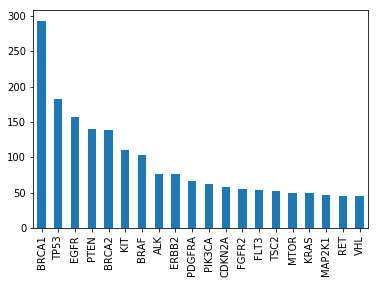

In [19]:
print(pd.value_counts(train['Gene']).nlargest(20))
pd.value_counts(train['Gene']).nlargest(20).plot(kind='bar')

TP53        40
EGFR        29
BRCA1       29
SCN4A       26
TSHR        21
ERBB2       18
BRAF        17
TP63        16
PTEN        15
BRCA2       14
SMAD4       14
PIK3CA      13
LRP5        13
GNE         13
SCN9A       13
CLDN16      12
SPAST       12
ADAMTS13    12
ASS1        12
KRAS        12
Name: Gene, dtype: int64


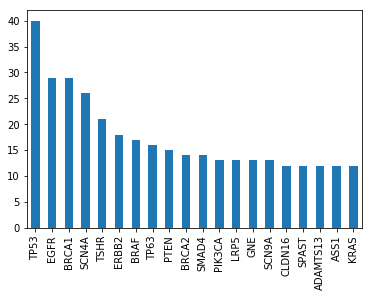

In [20]:
print(pd.value_counts(test['Gene']).nlargest(20))
pd.value_counts(test['Gene']).nlargest(20).plot(kind='bar')

Truncating Mutations         110
Deletion                      88
Amplification                 77
Fusions                       37
Overexpression                 6
Q61R                           4
G12V                           4
Q61L                           3
G13D                           3
E17K                           3
G12D                           3
Q61H                           3
G12C                           3
T58I                           3
P34R                           2
T167A                          2
C618R                          2
Promoter Hypermethylation      2
K117N                          2
T73I                           2
Name: Variation, dtype: int64


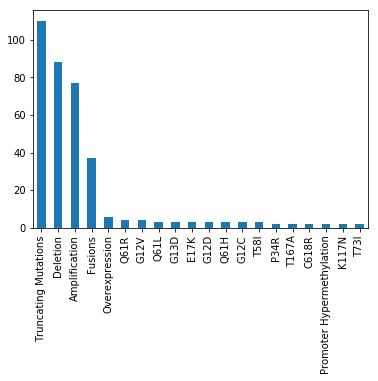

In [21]:
print(pd.value_counts(train['Variation']).nlargest(20))
pd.value_counts(train['Variation']).nlargest(20).plot(kind='bar')

Truncating Mutations    18
Deletion                14
Amplification            7
Fusions                  3
G13R                     2
G13S                     2
G44D                     2
P1193S                   1
T32R                     1
T1151R                   1
E746K                    1
F136L                    1
V617M                    1
R342S                    1
S251N                    1
L858H                    1
R273S                    1
A347S                    1
Y537N                    1
I254T                    1
Name: Variation, dtype: int64


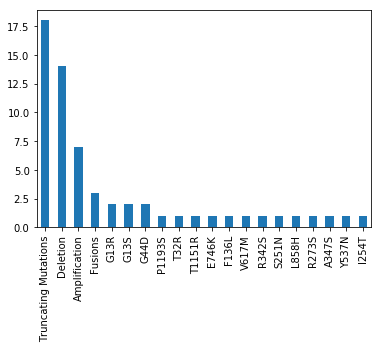

In [22]:
print(pd.value_counts(test['Variation']).nlargest(20))
pd.value_counts(test['Variation']).nlargest(20).plot(kind='bar')

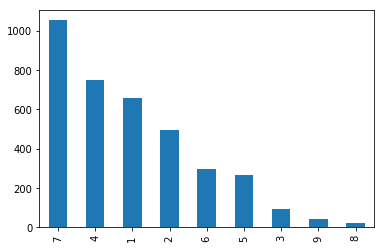

In [23]:
pd.value_counts(train['Class']).plot(kind='bar')

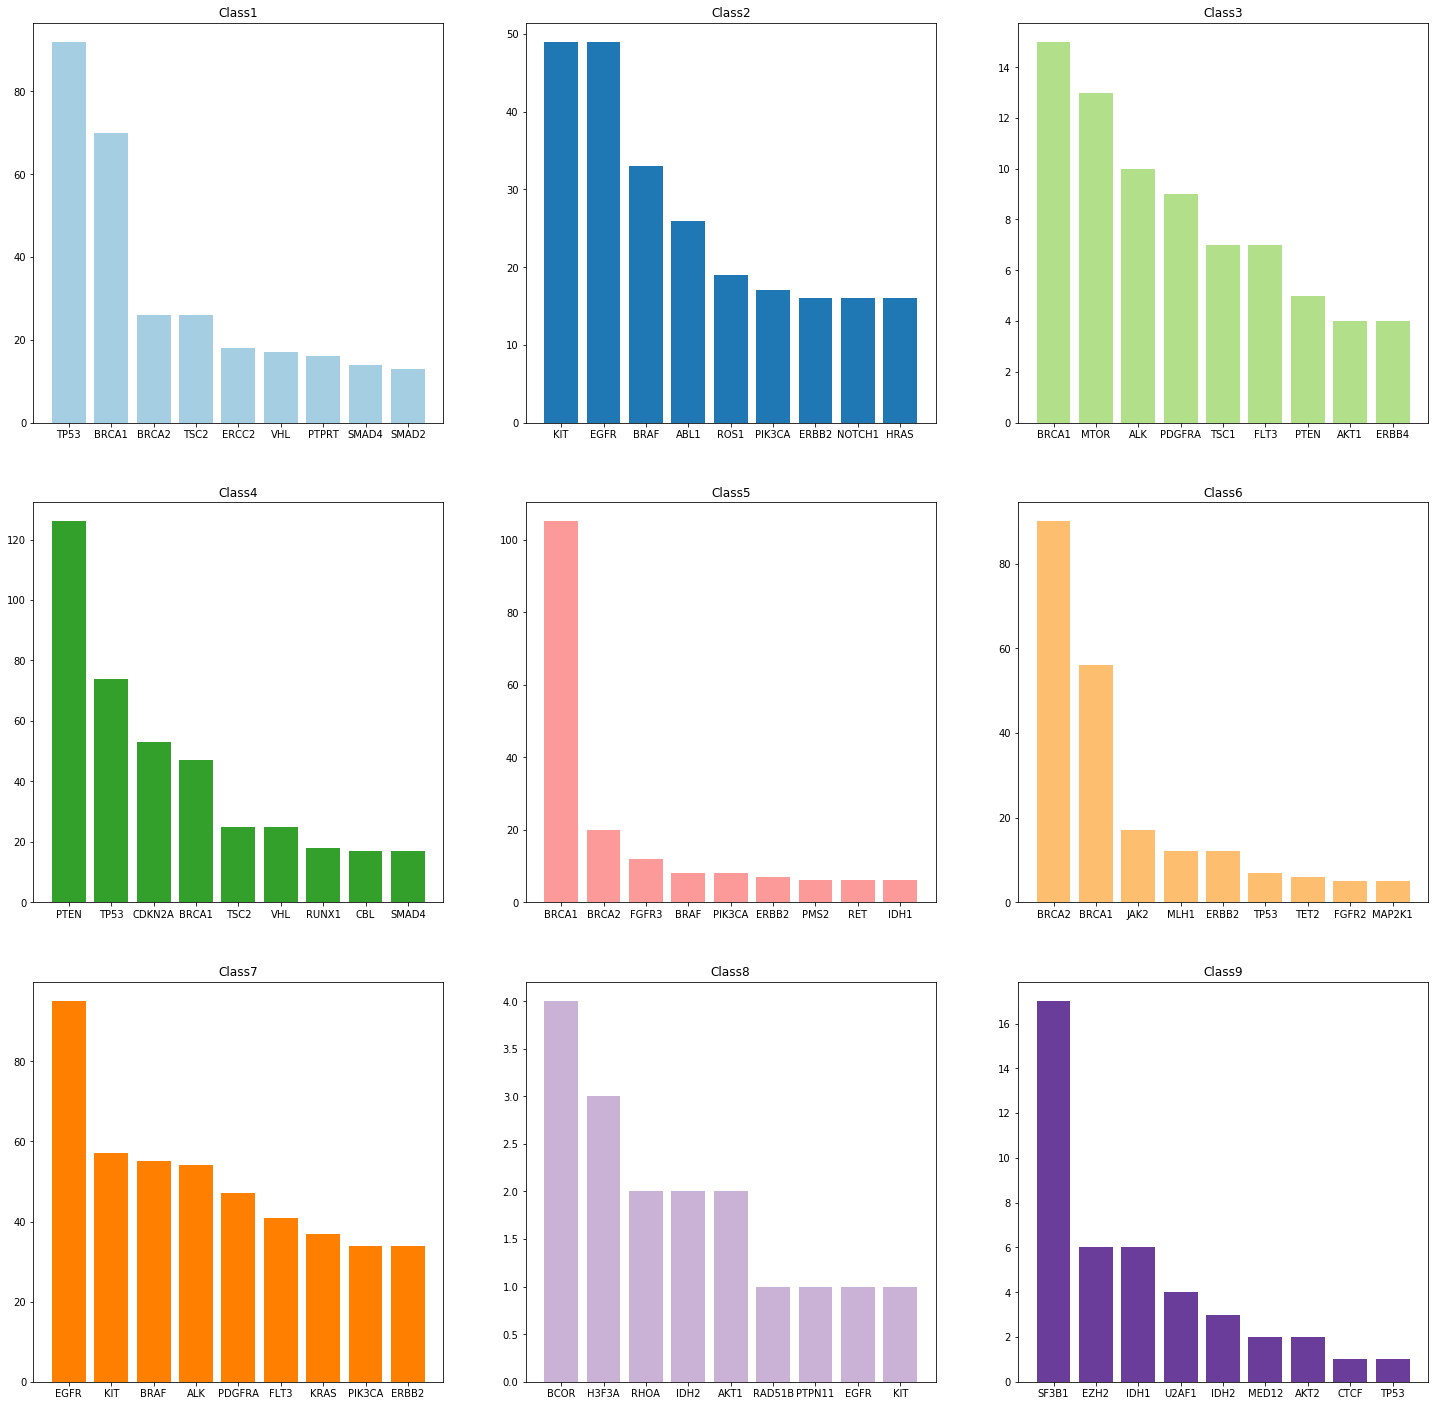

In [24]:
n_class = 9
max_displayed = 9

fig, axes = plt.subplots(3,3,figsize=(25,25))
labels = {}

for i, ax in enumerate(axes.flatten()):
    df = pd.DataFrame(pd.value_counts(train['Gene'][train['Class'] == (i+1)]).nlargest(max_displayed))
    df.columns = ['Freq']
    df['Gene'] = df.index
    df = df.reset_index()
    labels[i] = df['Gene'].values
    x = [i+1 for i in range(max_displayed)]
    y = df['Freq'].values
    title = 'Class' + str(i+1)
    ax.set_title(title)
    ax.bar(x, y, color=plt.cm.Paired(i/10.))
    ax.set_xticks(x)
    ax.set_xticklabels(labels[i])

    del df
plt.show()


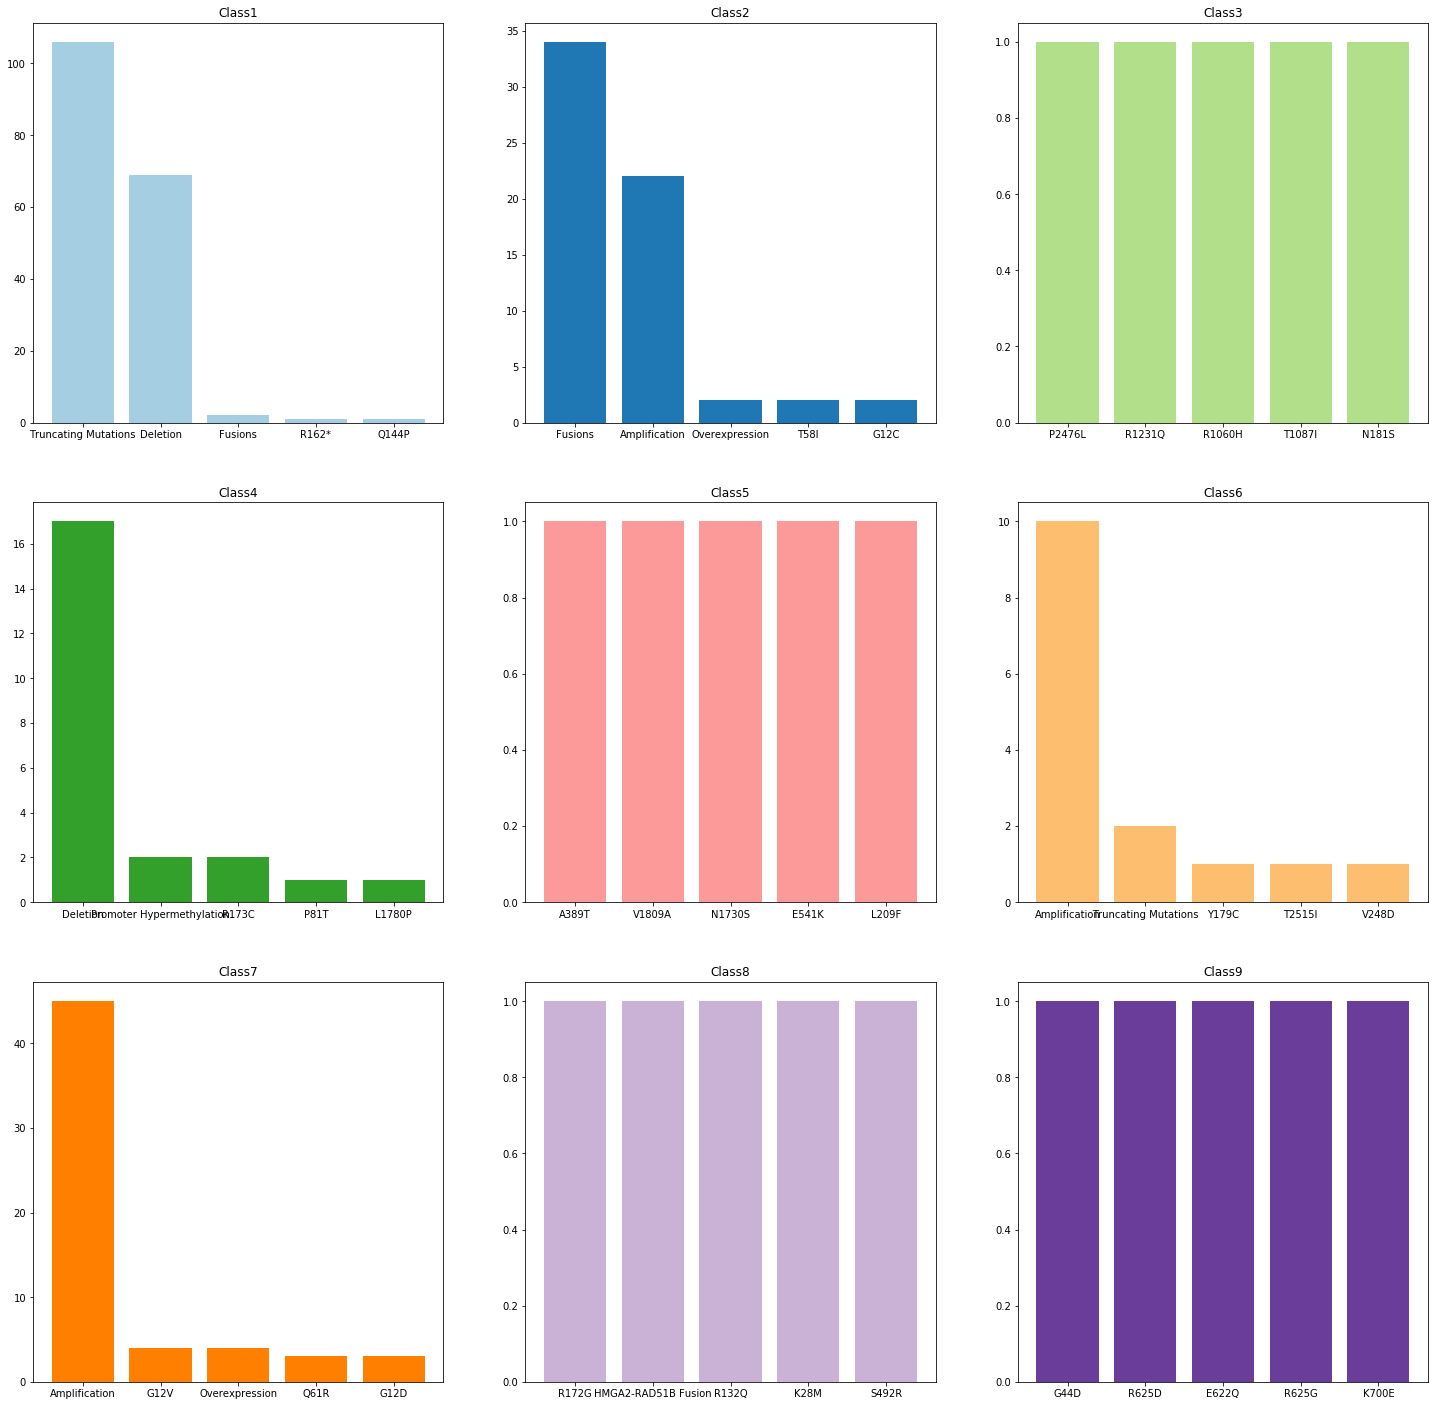

In [25]:
n_class = 9
max_displayed = 5

fig, axes = plt.subplots(3,3,figsize=(25,25))
labels = {}

for i, ax in enumerate(axes.flatten()):
    df = pd.DataFrame(pd.value_counts(train['Variation'][train['Class'] == (i+1)]).nlargest(max_displayed))
    df.columns = ['Freq']
    df['Variation'] = df.index
    df = df.reset_index()
    labels[i] = df['Variation'].values
    x = [i+1 for i in range(max_displayed)]
    y = df['Freq'].values
    title = 'Class' + str(i+1)
    ax.set_title(title)
    ax.bar(x, y, color=plt.cm.Paired(i/10.))
    ax.set_xticks(x)
    ax.set_xticklabels(labels[i])

    del df
plt.show()

In [26]:
train.head(40)

,index,Class,Gene,ID,Text,Variation,GL,VL
0,0,1,FAM58A,0,Cyclin-dependent kinases (CDKs) regulate a var...,Truncating Mutations,6,20
1,1,2,CBL,1,Abstract Background Non-small cell lung canc...,W802*,3,5
2,2,2,CBL,2,Abstract Background Non-small cell lung canc...,Q249E,3,5
3,3,3,CBL,3,Recent evidence has demonstrated that acquired...,N454D,3,5
4,4,4,CBL,4,Oncogenic mutations in the monomeric Casitas B...,L399V,3,5
5,5,4,CBL,5,Oncogenic mutations in the monomeric Casitas B...,V391I,3,5
6,6,5,CBL,6,Oncogenic mutations in the monomeric Casitas B...,V430M,3,5
7,7,1,CBL,7,CBL is a negative regulator of activated recep...,Deletion,3,8
8,8,4,CBL,8,Abstract Juvenile myelomonocytic leukemia (JM...,Y371H,3,5
9,9,4,CBL,9,Abstract Juvenile myelomonocytic leukemia (JM...,C384R,3,5


In [27]:
mg = mygene.MyGeneInfo()

In [28]:
xli = ['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1']

In [29]:
out = mg.querymany(xli, scopes='symbol', fields='entrezgene', species='human')

querying 1-5...done.
Finished.
1 input query terms found no hit:
	['FAM58A']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [30]:
print(out)

[{'query': 'FAM58A', 'notfound': True}, {'_id': '867', '_score': 93.044334, 'entrezgene': 867, 'query': 'CBL'}, {'_id': '8036', '_score': 98.05959, 'entrezgene': 8036, 'query': 'SHOC2'}, {'_id': '7015', '_score': 95.76235, 'entrezgene': 7015, 'query': 'TERT'}, {'_id': '23405', '_score': 96.54303, 'entrezgene': 23405, 'query': 'DICER1'}]


In [31]:
xli_all = set(train['Gene'].values)

In [32]:
out = mg.querymany(xli_all, scopes='symbol', fields='entrezgene', species='human')

querying 1-267...done.
Finished.
2 input query terms found dup hits:
	[('RYBP', 2), ('B2M', 3)]
3 input query terms found no hit:
	['WHSC1', 'FAM58A', 'WHSC1L1']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [33]:
print(out)

[{'_id': '7403', '_score': 97.72462, 'entrezgene': 7403, 'query': 'KDM6A'}, {'_id': '8036', '_score': 98.05959, 'entrezgene': 8036, 'query': 'SHOC2'}, {'_id': '1021', '_score': 98.39532, 'entrezgene': 1021, 'query': 'CDK6'}, {'_id': '26524', '_score': 96.83119, 'entrezgene': 26524, 'query': 'LATS2'}, {'_id': '2071', '_score': 97.11608, 'entrezgene': 2071, 'query': 'ERCC3'}, {'_id': '208', '_score': 100.402275, 'entrezgene': 208, 'query': 'AKT2'}, {'_id': '29072', '_score': 95.508644, 'entrezgene': 29072, 'query': 'SETD2'}, {'_id': '80312', '_score': 98.06639, 'entrezgene': 80312, 'query': 'TET1'}, {'_id': '1789', '_score': 96.8118, 'entrezgene': 1789, 'query': 'DNMT3B'}, {'_id': '5885', '_score': 96.81694, 'entrezgene': 5885, 'query': 'RAD21'}, {'_id': '6256', '_score': 97.11457, 'entrezgene': 6256, 'query': 'RXRA'}, {'_id': '1999', '_score': 98.41835, 'entrezgene': 1999, 'query': 'ELF3'}, {'_id': '9212', '_score': 100.88005, 'entrezgene': 9212, 'query': 'AURKB'}, {'_id': '4615', '_sco

In [34]:
from Bio import Entrez
Entrez.email = 'ashishlal@lazylearner.in'
handle = Entrez.einfo()
result=handle.read()
handle.close()
print(result)


<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20130322//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20130322/einfo.dtd">
<eInfoResult>
<DbList>

	<DbName>pubmed</DbName>
	<DbName>protein</DbName>
	<DbName>nuccore</DbName>
	<DbName>ipg</DbName>
	<DbName>nucleotide</DbName>
	<DbName>nucgss</DbName>
	<DbName>nucest</DbName>
	<DbName>structure</DbName>
	<DbName>sparcle</DbName>
	<DbName>genome</DbName>
	<DbName>annotinfo</DbName>
	<DbName>assembly</DbName>
	<DbName>bioproject</DbName>
	<DbName>biosample</DbName>
	<DbName>blastdbinfo</DbName>
	<DbName>books</DbName>
	<DbName>cdd</DbName>
	<DbName>clinvar</DbName>
	<DbName>clone</DbName>
	<DbName>gap</DbName>
	<DbName>gapplus</DbName>
	<DbName>grasp</DbName>
	<DbName>dbvar</DbName>
	<DbName>gene</DbName>
	<DbName>gds</DbName>
	<DbName>geoprofiles</DbName>
	<DbName>homologene</DbName>
	<DbName>medgen</DbName>
	<DbName>mesh</DbName>
	<DbName>ncbisearch</DbName>
	<DbName>nlmcatalog</DbName>
	<DbName

In [35]:
#http://biopython.org/wiki/Annotate_Entrez_Gene_IDs
def retrieve_annotation(id_list):

    """Annotates Entrez Gene IDs using Bio.Entrez, in particular epost (to
    submit the data to NCBI) and esummary to retrieve the information.
    Returns a list of dictionaries with the annotations."""

    request = Entrez.epost("gene",id=",".join(id_list))
    try:
        result = Entrez.read(request)
    except RuntimeError as e:
        #FIXME: How generate NAs instead of causing an error with invalid IDs?
        print("An error occurred while retrieving the annotations.")
        print("The error returned was %s" % e)
        sys.exit(-1)

    webEnv = result["WebEnv"]
    queryKey = result["QueryKey"]
    data = Entrez.esummary(db="gene", webenv=webEnv, query_key =
            queryKey)
    annotations = Entrez.read(data)

    print("Retrieved %d annotations for %d genes" % (len(annotations),len(id_list)))

    return annotations


In [36]:
def print_data(annotation):
    for gene_data in annotation['DocumentSummarySet']:
        print(gene_data)
        gene_id = gene_data["Id"]
        gene_symbol = gene_data["NomenclatureSymbol"]
        gene_name = gene_data["Description"]
        print("ID: %s - Gene Symbol: %s - Gene Name: %s" % (gene_id, gene_symbol, gene_name))

In [38]:
len(entrez_ids)

0

In [39]:
ann= retrieve_annotation(['867'])

Retrieved 1 annotations for 1 genes


In [40]:
print(ann)

{'DocumentSummarySet': DictElement({'DocumentSummary': [DictElement({'Name': 'CBL', 'Description': 'Cbl proto-oncogene', 'Status': '0', 'CurrentID': '0', 'Chromosome': '11', 'GeneticSource': 'genomic', 'MapLocation': '11q23.3', 'OtherAliases': 'C-CBL, CBL2, FRA11B, NSLL, RNF55', 'OtherDesignations': 'E3 ubiquitin-protein ligase CBL|Cas-Br-M (murine) ecotropic retroviral transforming sequence|Cbl proto-oncogene, E3 ubiquitin protein ligase|RING finger protein 55|RING-type E3 ubiquitin transferase CBL|casitas B-lineage lymphoma proto-oncogene|fragile site, folic acid type, rare, fra(11)(q23.3)|oncogene CBL2|proto-oncogene c-Cbl|signal transduction protein CBL', 'NomenclatureSymbol': 'CBL', 'NomenclatureName': 'Cbl proto-oncogene', 'NomenclatureStatus': 'Official', 'Mim': ['165360'], 'GenomicInfo': [{'ChrLoc': '11', 'ChrAccVer': 'NC_000011.10', 'ChrStart': '119206275', 'ChrStop': '119308148', 'ExonCount': '18'}], 'GeneWeight': '51854', 'Summary': "This gene is a proto-oncogene that encode

In [41]:
# look at https://github.com/taoliu/taolib/blob/master/Scripts/convert_gene_ids.py

In [42]:
import pprint

In [43]:
pp = pprint.PrettyPrinter(indent=4)

In [44]:
pp.pprint(ann)

{   'DocumentSummarySet': {   'DbBuild': 'Build171108-2325m.1',
                              'DocumentSummary': [   {   'ChrSort': '11',
                                                         'ChrStart': '119206275',
                                                         'Chromosome': '11',
                                                         'CurrentID': '0',
                                                         'Description': 'Cbl proto-oncogene',
                                                         'GeneWeight': '51854',
                                                         'GeneticSource': 'genomic',
                                                         'GenomicInfo': [{'ChrLoc': '11', 'ChrAccVer': 'NC_000011.10', 'ChrStart': '119206275', 'ChrStop': '119308148', 'ExonCount': '18'}],
                                                         'LocationHist': [{'AnnotationRelease': '108', 'AssemblyAccVer': 'GCF_000001405.33', 'ChrAccVer': 'NC_000011.10', 'ChrStart'

In [45]:
import json

In [46]:
data = ann['DocumentSummarySet']['DocumentSummary']

In [47]:
print(data)

[DictElement({'Name': 'CBL', 'Description': 'Cbl proto-oncogene', 'Status': '0', 'CurrentID': '0', 'Chromosome': '11', 'GeneticSource': 'genomic', 'MapLocation': '11q23.3', 'OtherAliases': 'C-CBL, CBL2, FRA11B, NSLL, RNF55', 'OtherDesignations': 'E3 ubiquitin-protein ligase CBL|Cas-Br-M (murine) ecotropic retroviral transforming sequence|Cbl proto-oncogene, E3 ubiquitin protein ligase|RING finger protein 55|RING-type E3 ubiquitin transferase CBL|casitas B-lineage lymphoma proto-oncogene|fragile site, folic acid type, rare, fra(11)(q23.3)|oncogene CBL2|proto-oncogene c-Cbl|signal transduction protein CBL', 'NomenclatureSymbol': 'CBL', 'NomenclatureName': 'Cbl proto-oncogene', 'NomenclatureStatus': 'Official', 'Mim': ['165360'], 'GenomicInfo': [{'ChrLoc': '11', 'ChrAccVer': 'NC_000011.10', 'ChrStart': '119206275', 'ChrStop': '119308148', 'ExonCount': '18'}], 'GeneWeight': '51854', 'Summary': "This gene is a proto-oncogene that encodes a RING finger E3 ubiquitin ligase. The encoded protei

In [48]:
for i, el in enumerate(d for d in data):
    print(i,el)
    print('\n')
    print(el['Name'])
    print(el['Summary'])
    print(el["Organism"]['TaxID'])

0 DictElement({'Name': 'CBL', 'Description': 'Cbl proto-oncogene', 'Status': '0', 'CurrentID': '0', 'Chromosome': '11', 'GeneticSource': 'genomic', 'MapLocation': '11q23.3', 'OtherAliases': 'C-CBL, CBL2, FRA11B, NSLL, RNF55', 'OtherDesignations': 'E3 ubiquitin-protein ligase CBL|Cas-Br-M (murine) ecotropic retroviral transforming sequence|Cbl proto-oncogene, E3 ubiquitin protein ligase|RING finger protein 55|RING-type E3 ubiquitin transferase CBL|casitas B-lineage lymphoma proto-oncogene|fragile site, folic acid type, rare, fra(11)(q23.3)|oncogene CBL2|proto-oncogene c-Cbl|signal transduction protein CBL', 'NomenclatureSymbol': 'CBL', 'NomenclatureName': 'Cbl proto-oncogene', 'NomenclatureStatus': 'Official', 'Mim': ['165360'], 'GenomicInfo': [{'ChrLoc': '11', 'ChrAccVer': 'NC_000011.10', 'ChrStart': '119206275', 'ChrStop': '119308148', 'ExonCount': '18'}], 'GeneWeight': '51854', 'Summary': "This gene is a proto-oncogene that encodes a RING finger E3 ubiquitin ligase. The encoded prote

In [49]:
handle = Entrez.esearch(db="nucleotide", term="CBL", idtype="acc", usehistory="y")

In [50]:
record = Entrez.read(handle)
print(record["Count"])
print(record["IdList"])

63016
['PENM01000001.1', 'PENP01000112.1', 'PENQ01000023.1', 'PENN01000001.1', 'PENR01000003.1', 'PENJ01000016.1', 'PENL01000012.1', 'PENK01000042.1', 'PENO01000016.1', 'CP024458.1', 'CP024038.1', 'CP018056.1', 'CP017994.1', 'NKYI01000025.1', 'PELJ01000005.1', 'CP023541.1', 'CP023502.1', 'MRZV01000210.1', 'CP024556.1', 'CP024549.1']


In [51]:
handle.close()

In [52]:
print(record)

{'Count': '63016', 'RetMax': '20', 'RetStart': '0', 'QueryKey': '1', 'WebEnv': 'NCID_1_77288630_130.14.18.34_9001_1510313201_311128994_0MetA0_S_MegaStore_F_1', 'IdList': ['PENM01000001.1', 'PENP01000112.1', 'PENQ01000023.1', 'PENN01000001.1', 'PENR01000003.1', 'PENJ01000016.1', 'PENL01000012.1', 'PENK01000042.1', 'PENO01000016.1', 'CP024458.1', 'CP024038.1', 'CP018056.1', 'CP017994.1', 'NKYI01000025.1', 'PELJ01000005.1', 'CP023541.1', 'CP023502.1', 'MRZV01000210.1', 'CP024556.1', 'CP024549.1'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'CBL[All Fields]', 'Field': 'All Fields', 'Count': '63016', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'CBL[All Fields]'}


In [53]:
webenv = record["WebEnv"]
query_key = record["QueryKey"]


In [54]:
acc_list = record["IdList"]
count = int(record["Count"])
count == len(acc_list)

False

In [55]:
print(count)

63016


In [56]:
print(len(acc_list))

20


In [57]:
try:
    from urllib.error import HTTPError  # for Python 3
except ImportError:
    from urllib2 import HTTPError  # for Python 2

batch_size = 3
out_handle = open("../cache/CBL.fasta", "w")
for start in range(0, len(acc_list), batch_size):
    end = min(count, start+batch_size)
    print("Going to download record %i to %i" % (start+1, end))
    attempt = 0
    while attempt < 3:
        attempt += 1
        try:
            fetch_handle = Entrez.efetch(db="nucleotide",
                                         rettype="fasta", retmode="text",
                                         retstart=start, retmax=batch_size,
                                         webenv=webenv, query_key=query_key,
                                         idtype="acc")
        except HTTPError as err:
            if 500 <= err.code <= 599:
                print("Received error from server %s" % err)
                print("Attempt %i of 3" % attempt)
                time.sleep(15)
            else:
                raise
    data = fetch_handle.read()
    fetch_handle.close()
    out_handle.write(data)
out_handle.close()

Going to download record 1 to 3
Going to download record 4 to 6
Going to download record 7 to 9
Going to download record 10 to 12
Going to download record 13 to 15
Going to download record 16 to 18
Going to download record 19 to 21


In [58]:
train.head()

,index,Class,Gene,ID,Text,Variation,GL,VL
0,0,1,FAM58A,0,Cyclin-dependent kinases (CDKs) regulate a var...,Truncating Mutations,6,20
1,1,2,CBL,1,Abstract Background Non-small cell lung canc...,W802*,3,5
2,2,2,CBL,2,Abstract Background Non-small cell lung canc...,Q249E,3,5
3,3,3,CBL,3,Recent evidence has demonstrated that acquired...,N454D,3,5
4,4,4,CBL,4,Oncogenic mutations in the monomeric Casitas B...,L399V,3,5


In [59]:
fields = ['accession', 'alias', 'AnimalQTLdb', 'biocrata', 'ec', 'ensembl', 'entrezgene',
          'exac', 'exons', 'FLYBASE', 'generif', 'genomic_pos', 'go']

In [60]:
xli = ['CBL']

In [61]:
out1 = mg.querymany(xli, scopes='symbol', fields=fields, species='human')

querying 1-1...done.
Finished.


In [62]:
len(xli)

1

In [63]:
out1

[{'_id': '867',
  '_score': 93.044334,
  'accession': {'genomic': ['AMYH02025663.1',
    'AMYH02025664.1',
    'AMYH02025665.1',
    'AP002956.1',
    'AY126609.1',
    'CH471065.1',
    'KP203813.1',
    'NC_000011.10',
    'NC_018922.2',
    'NG_016808.1',
    'X82654.1'],
   'protein': ['AAI32734.1',
    'AAI36464.1',
    'AJW66371.1',
    'CAA40393.1',
    'CAA57977.1',
    'EAW67476.1',
    'NP_005179.2',
    'P22681.2',
    'XP_011541359.1',
    'XP_016874000.1'],
   'rna': ['AA806454.1',
    'AK092300.1',
    'AL832396.1',
    'BC132733.1',
    'BC136463.1',
    'BG722940.1',
    'BX648139.1',
    'DB457271.2',
    'NM_005188.3',
    'X57110.1',
    'X69207.1',
    'XM_011543057.2',
    'XM_017018511.1'],
   'translation': [{'protein': 'CAA40393.1', 'rna': 'X57110.1'},
    {'protein': 'NP_005179.2', 'rna': 'NM_005188.3'},
    {'protein': 'XP_016874000.1', 'rna': 'XM_017018511.1'},
    {'protein': 'XP_011541359.1', 'rna': 'XM_011543057.2'},
    {'protein': 'AAI32734.1', 'rna': 'B

In [64]:
train.head()

,index,Class,Gene,ID,Text,Variation,GL,VL
0,0,1,FAM58A,0,Cyclin-dependent kinases (CDKs) regulate a var...,Truncating Mutations,6,20
1,1,2,CBL,1,Abstract Background Non-small cell lung canc...,W802*,3,5
2,2,2,CBL,2,Abstract Background Non-small cell lung canc...,Q249E,3,5
3,3,3,CBL,3,Recent evidence has demonstrated that acquired...,N454D,3,5
4,4,4,CBL,4,Oncogenic mutations in the monomeric Casitas B...,L399V,3,5


In [65]:
l = train.loc[1]['Text']

In [66]:
print(l)

 Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n = 8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using select c-CBL som

In [69]:
def create_train_txt_file(index):
    text = train.loc[index]['Text']
    if text == '':
        print('empty text: {%d}'.format(index))
    fname = '../cache/rsid/' + str(index) + '.txt'
    fdict = '{\'sourcedb\'=\'PubMed\',\'sourceid\'=\'11111111\',\'text\'=' + text + '}'
    with open(fname, 'w') as f:
        f.write(fdict)
        f.flush()
        f.close()

In [70]:
# from joblib import Parallel, delayed
# Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))

In [75]:
train.shape

(3683, 8)

In [76]:
Parallel(n_jobs=20)(delayed(create_train_txt_file)(i) for i in range(train.shape[0]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [115]:
def create_test_txt_file(index):
    text = test.loc[index]['Text']
    if text == '':
        print('empty text: {%d}'.format(index))
    fname = '../cache/test_rsid/' + str(index) + '.txt'
    fdict = '{\'sourcedb\'=\'PubMed\',\'sourceid\'=\'11111111\',\'text\'=' + text + '}'
    with open(fname, 'w') as f:
        f.write(fdict)
        f.flush()
        f.close()

In [169]:
test.shape

(986, 4)

In [170]:
test.tail()

,ID,Gene,Variation,Text
981,982,TP63,S580P,IκB kinase β (IKKβ) is involved in tumor devel...
982,983,SCN4A,R672G,he identification of subtype-specific transloc...
983,984,BRAF,N581H,Cardio-facio-cutaneous (CFC) syndrome (MIM 115...
984,985,TSHR,S281N,Screening for tumor suppressor genes in breast...
985,986,ASS1,S180N,"Histiocytic neoplasms are clonal, hematopoieti..."


In [121]:
Parallel(n_jobs=20)(delayed(create_test_txt_file)(i) for i in range(1,test.shape[0]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [171]:
create_test_txt_file(0)

In [126]:
def bash_command(cmd):
    process = subprocess.Popen(cmd, shell=True, executable='/bin/bash')
    try:
        process.wait(300)
    except:
        print('timeout for {}'.format(cmd))

In [78]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('../cache/rsid'):
    f.extend(filenames)
    break

In [79]:
len(f)

3683

In [80]:
f

['904.txt',
 '3582.txt',
 '442.txt',
 '3106.txt',
 '623.txt',
 '1791.txt',
 '3520.txt',
 '2666.txt',
 '1903.txt',
 '2411.txt',
 '3542.txt',
 '1474.txt',
 '1600.txt',
 '2158.txt',
 '2927.txt',
 '2124.txt',
 '3497.txt',
 '1822.txt',
 '1734.txt',
 '460.txt',
 '2831.txt',
 '101.txt',
 '897.txt',
 '455.txt',
 '1992.txt',
 '824.txt',
 '3050.txt',
 '520.txt',
 '2513.txt',
 '1963.txt',
 '1837.txt',
 '1062.txt',
 '2719.txt',
 '1910.txt',
 '2282.txt',
 '1006.txt',
 '1440.txt',
 '2720.txt',
 '1287.txt',
 '3505.txt',
 '1437.txt',
 '3067.txt',
 '890.txt',
 '3679.txt',
 '2914.txt',
 '3481.txt',
 '2144.txt',
 '3364.txt',
 '1119.txt',
 '28.txt',
 '3449.txt',
 '2837.txt',
 '1595.txt',
 '1387.txt',
 '615.txt',
 '3447.txt',
 '1345.txt',
 '449.txt',
 '2278.txt',
 '923.txt',
 '3407.txt',
 '1316.txt',
 '502.txt',
 '864.txt',
 '391.txt',
 '1024.txt',
 '281.txt',
 '108.txt',
 '2536.txt',
 '2915.txt',
 '3568.txt',
 '821.txt',
 '2978.txt',
 '477.txt',
 '1670.txt',
 '3392.txt',
 '1359.txt',
 '3296.txt',
 '2622.t

In [81]:
train.shape

(3683, 8)

In [82]:
train.head()

,index,Class,Gene,ID,Text,Variation,GL,VL
0,0,1,FAM58A,0,Cyclin-dependent kinases (CDKs) regulate a var...,Truncating Mutations,6,20
1,1,2,CBL,1,Abstract Background Non-small cell lung canc...,W802*,3,5
2,2,2,CBL,2,Abstract Background Non-small cell lung canc...,Q249E,3,5
3,3,3,CBL,3,Recent evidence has demonstrated that acquired...,N454D,3,5
4,4,4,CBL,4,Oncogenic mutations in the monomeric Casitas B...,L399V,3,5


In [106]:
# output file format
# <PMID>|t|<TITLE>
# <PMID>|a|<ABSTRACT>
# <PMID><tab><OFFSET_START><tab><OFFSET_END><tab><MENTION><tab><TYPE><tab><Normalized Form>
def create_train_tmvar_files(index):
    in_file = '../cache/rsid/' + str(index) + '.txt'
    out_file = '../cache/rsid/tmVar_op/' + str(index) + '.out.tmVar'
    cmd = 'python2 RESTful.client.post.py -i {} -t tmVar -e ashishlal@lazylearner.in > {}'.format(in_file, out_file)
    print('Excuting: {}'.format(cmd))
    bash_command(cmd)
    

In [96]:
Parallel(n_jobs=20)(delayed(create_train_tmvar_files)(i) for i in range(train.shape[0]))

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/0.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/0.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/4.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/4.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/7.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/7.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/10.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/10.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/8.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/8.out.tmVar
Excuting: python2 RESTful.client

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/59.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/59.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/60.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/60.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/61.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/61.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/62.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/62.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/63.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/63.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/64.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/64.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/65.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/65.out.tmVar
Excuting: python2 RE

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/118.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/118.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/119.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/119.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/120.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/120.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/121.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/121.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/122.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/122.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/123.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/123.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/124.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/124.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/176.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/176.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/177.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/177.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/178.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/178.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/179.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/179.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/180.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/180.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/181.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/181.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/182.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/182.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/234.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/234.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/235.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/235.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/236.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/236.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/237.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/237.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/238.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/238.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/239.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/239.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/240.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/240.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/292.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/292.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/293.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/293.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/294.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/294.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/295.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/295.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/296.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/296.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/297.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/297.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/298.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/298.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/350.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/350.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/351.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/351.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/352.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/352.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/353.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/353.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/354.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/354.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/355.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/355.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/356.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/356.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/408.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/408.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/409.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/409.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/410.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/410.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/411.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/411.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/412.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/412.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/413.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/413.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/414.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/414.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/466.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/466.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/467.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/467.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/468.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/468.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/469.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/469.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/470.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/470.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/471.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/471.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/472.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/472.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/524.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/524.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/525.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/525.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/526.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/526.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/527.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/527.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/528.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/528.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/529.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/529.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/530.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/530.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/582.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/582.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/583.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/583.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/584.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/584.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/585.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/585.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/586.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/586.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/587.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/587.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/588.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/588.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/640.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/640.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/641.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/641.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/642.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/642.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/643.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/643.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/644.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/644.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/645.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/645.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/646.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/646.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/698.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/698.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/699.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/699.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/700.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/700.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/701.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/701.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/702.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/702.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/703.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/703.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/704.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/704.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/756.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/756.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/757.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/757.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/758.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/758.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/759.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/759.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/760.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/761.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/761.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/762.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/762.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/814.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/814.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/815.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/815.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/816.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/816.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/817.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/817.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/818.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/818.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/819.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/819.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/820.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/820.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/872.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/872.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/873.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/873.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/874.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/874.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/875.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/875.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/876.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/876.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/877.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/877.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/878.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/878.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/930.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/930.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/931.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/931.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/932.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/932.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/933.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/933.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/934.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/934.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/935.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/935.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/936.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/936.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/988.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/988.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/989.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/989.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/990.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/990.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/991.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/991.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/992.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/992.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/993.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/993.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/994.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/994.out.tmVar
Excuti

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1046.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1046.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1047.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1047.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1048.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1048.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1049.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1049.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1050.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1050.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1051.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1051.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1052.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1052.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1103.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1103.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1104.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1104.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1105.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1105.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1106.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1106.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1107.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1107.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1108.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1108.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1109.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1109.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1160.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1160.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1161.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1161.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1162.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1162.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1163.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1163.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1164.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1164.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1165.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1165.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1166.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1166.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1217.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1217.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1218.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1218.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1219.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1219.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1220.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1220.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1221.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1221.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1222.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1222.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1223.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1223.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1274.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1274.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1275.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1275.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1276.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1276.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1277.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1277.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1278.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1278.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1279.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1279.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1280.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1280.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1331.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1331.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1332.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1332.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1333.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1333.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1334.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1334.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1335.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1335.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1336.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1336.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1337.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1337.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1388.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1388.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1389.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1389.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1390.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1390.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1391.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1391.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1392.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1392.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1393.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1393.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1394.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1394.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1445.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1445.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1446.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1446.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1447.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1447.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1448.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1448.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1449.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1449.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1450.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1450.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1451.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1451.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1502.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1502.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1503.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1503.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1504.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1504.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1505.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1505.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1506.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1506.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1507.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1507.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1508.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1508.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1559.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1559.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1560.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1560.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1561.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1561.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1562.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1562.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1563.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1563.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1564.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1564.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1565.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1565.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1616.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1616.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1617.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1617.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1618.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1618.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1619.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1619.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1620.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1620.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1621.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1621.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1622.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1622.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1673.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1673.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1674.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1674.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1675.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1675.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1676.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1676.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1677.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1677.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1678.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1678.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1679.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1679.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1730.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1730.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1731.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1731.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1732.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1732.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1733.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1733.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1734.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1734.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1735.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1735.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1736.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1736.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1787.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1787.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1788.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1788.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1789.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1789.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1790.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1790.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1791.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1791.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1792.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1792.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1793.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1793.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1844.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1844.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1845.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1845.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1846.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1846.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1847.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1847.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1848.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1848.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1849.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1849.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1850.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1850.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1901.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1901.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1902.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1902.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1903.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1903.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1904.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1904.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1905.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1905.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1906.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1906.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1907.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1907.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1958.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1958.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1959.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1959.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1960.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1960.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1961.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1961.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1962.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1962.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1963.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1963.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1964.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1964.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2015.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2015.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2016.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2016.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2017.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2017.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2018.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2018.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2019.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2019.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2020.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2020.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2021.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2021.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2072.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2072.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2073.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2073.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2074.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2074.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2075.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2075.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2076.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2076.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2077.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2077.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2078.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2078.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2129.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2129.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2130.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2130.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2131.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2131.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2132.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2132.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2133.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2133.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2134.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2134.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2135.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2135.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2186.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2186.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2187.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2187.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2188.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2188.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2189.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2189.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2190.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2190.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2191.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2191.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2192.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2192.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2243.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2243.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2244.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2244.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2245.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2245.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2246.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2246.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2247.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2247.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2248.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2248.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2249.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2249.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2300.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2300.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2301.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2301.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2302.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2302.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2303.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2303.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2304.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2304.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2305.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2305.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2306.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2306.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2357.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2357.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2358.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2358.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2359.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2359.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2360.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2360.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2361.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2361.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2362.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2362.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2363.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2363.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2414.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2414.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2415.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2415.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2416.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2416.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2417.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2417.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2418.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2418.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2419.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2419.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2420.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2420.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2471.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2471.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2472.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2472.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2473.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2473.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2474.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2474.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2475.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2475.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2476.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2476.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2477.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2477.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2528.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2528.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2529.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2529.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2530.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2530.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2531.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2531.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2532.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2532.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2533.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2533.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2534.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2534.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2585.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2585.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2586.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2586.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2587.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2587.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2588.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2588.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2589.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2589.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2590.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2590.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2591.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2591.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2642.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2642.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2643.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2643.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2644.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2644.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2645.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2645.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2646.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2646.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2647.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2647.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2648.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2648.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2699.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2699.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2700.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2700.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2701.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2701.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2702.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2702.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2703.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2703.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2704.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2704.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2705.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2705.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2756.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2756.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2757.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2757.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2758.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2758.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2759.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2759.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2760.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2761.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2761.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2762.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2762.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2813.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2813.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2814.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2814.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2815.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2815.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2816.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2816.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2817.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2817.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2818.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2818.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2819.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2819.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2870.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2870.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2871.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2871.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2872.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2872.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2873.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2873.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2874.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2874.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2875.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2875.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2876.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2876.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2927.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2927.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2928.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2928.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2929.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2929.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2930.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2930.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2931.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2931.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2932.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2932.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2933.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2933.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2984.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2984.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2985.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2985.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2986.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2986.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2987.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2987.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2988.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2988.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2989.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2989.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2990.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2990.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3041.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3041.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3042.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3042.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3043.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3043.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3044.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3044.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3045.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3045.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3046.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3046.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3047.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3047.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3098.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3098.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3099.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3099.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3100.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3100.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3101.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3101.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3102.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3102.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3103.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3103.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3104.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3104.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3155.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3155.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3156.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3156.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3157.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3157.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3158.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3158.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3159.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3159.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3160.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3160.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3161.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3161.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3212.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3212.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3213.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3213.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3214.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3214.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3215.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3215.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3216.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3216.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3217.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3217.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3218.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3218.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3269.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3269.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3270.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3270.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3271.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3271.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3272.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3272.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3273.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3273.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3274.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3274.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3275.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3275.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3326.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3326.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3327.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3327.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3328.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3328.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3329.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3329.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3330.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3330.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3331.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3331.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3332.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3332.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3383.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3383.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3384.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3384.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3385.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3385.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3386.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3386.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3387.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3387.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3388.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3388.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3389.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3389.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3440.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3440.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3441.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3441.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3442.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3442.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3443.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3443.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3444.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3444.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3445.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3445.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3446.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3446.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3497.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3497.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3498.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3498.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3499.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3499.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3500.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3500.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3501.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3501.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3502.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3502.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3503.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3503.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3554.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3554.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3555.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3555.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3556.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3556.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3557.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3557.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3558.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3558.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3559.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3559.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3560.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3560.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3611.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3611.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3612.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3612.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3613.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3613.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3614.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3614.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3615.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3615.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3616.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3616.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3617.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3617.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3668.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3668.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3669.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3669.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3670.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3670.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3671.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3671.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3672.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3672.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3673.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3673.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3674.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3674.ou

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [97]:
from os import listdir
from os.path import isfile, join
mypath = '../cache/rsid/tmVar_op'
allfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [98]:
print(allfiles)

['2335.out.tmVar', '325.out.tmVar', '3521.out.tmVar', '1561.out.tmVar', '1529.out.tmVar', '1285.out.tmVar', '210.out.tmVar', '3433.out.tmVar', '2926.out.tmVar', '777.out.tmVar', '2543.out.tmVar', '449.out.tmVar', '1782.out.tmVar', '1488.out.tmVar', '2029.out.tmVar', '2073.out.tmVar', '3065.out.tmVar', '175.out.tmVar', '2970.out.tmVar', '2249.out.tmVar', '2897.out.tmVar', '1512.out.tmVar', '95.out.tmVar', '3296.out.tmVar', '3295.out.tmVar', '1832.out.tmVar', '2810.out.tmVar', '2353.out.tmVar', '991.out.tmVar', '686.out.tmVar', '3371.out.tmVar', '3306.out.tmVar', '2098.out.tmVar', '558.out.tmVar', '2629.out.tmVar', '219.out.tmVar', '2229.out.tmVar', '3349.out.tmVar', '2037.out.tmVar', '88.out.tmVar', '626.out.tmVar', '951.out.tmVar', '483.out.tmVar', '3210.out.tmVar', '3462.out.tmVar', '1389.out.tmVar', '3406.out.tmVar', '34.out.tmVar', '1122.out.tmVar', '110.out.tmVar', '1395.out.tmVar', '1153.out.tmVar', '1624.out.tmVar', '1403.out.tmVar', '3021.out.tmVar', '901.out.tmVar', '3185.out.t

In [102]:
do_again = []
for f in allfiles:
    fname = mypath + '/' + f
    statinfo = os.stat(fname)
    sz = statinfo.st_size
    if sz <= 150:
        do_again.append(f.split('.')[0])

In [104]:
print(len(do_again))

813


In [107]:
Parallel(n_jobs=4)(delayed(create_train_tmvar_files)(i) for i in do_again)

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1782.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1782.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2029.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2029.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1285.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1285.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/449.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/449.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2073.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2073.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/175.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/175.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/219.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/219.out.tmVa

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/67.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/67.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/368.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/368.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2473.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2473.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/197.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/197.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3517.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3517.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1544.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1544.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3127.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3127.out.tmVar


Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1981.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1981.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/869.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/869.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2803.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2803.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/754.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/754.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/701.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/701.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/236.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/236.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2840.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2840.out.tmVar


Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1932.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1932.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/240.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/240.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1740.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1740.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3017.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3017.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1829.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1829.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2237.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2237.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/11.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/11.out.tmVa

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/399.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/399.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3252.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3252.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3394.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3394.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2379.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2379.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/221.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/221.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1047.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1047.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3531.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3531.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/195.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/195.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3033.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3033.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2688.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2688.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1421.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1421.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1170.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1170.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2790.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2790.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2369.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2369.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1256.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1256.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2966.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2966.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/534.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/534.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1062.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1062.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3527.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3527.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1688.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1688.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/824.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/824.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2347.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2347.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1948.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1948.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/272.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/272.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3466.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3466.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1128.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1128.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3615.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3615.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/276.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/276.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/40.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/40.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1316.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1316.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1921.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1921.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1207.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1207.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/139.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/139.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/203.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/203.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2794.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2794.out.tmVar


Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2862.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2862.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1077.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1077.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2042.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2042.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1385.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1385.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3149.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3149.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2077.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2077.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3423.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3423.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1254.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1254.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1789.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1789.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2404.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2404.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3089.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3089.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1823.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1823.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1070.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1070.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1790.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1790.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3412.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3412.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/191.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/191.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1012.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1012.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1883.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1883.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/129.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/129.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3363.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3363.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1016.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1016.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2393.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2393.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1060.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1060.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3670.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3670.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1522.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1522.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2031.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2031.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2985.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2985.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2080.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2080.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1014.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1014.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1230.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1230.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1982.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1982.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1324.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1324.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/516.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/516.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3382.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3382.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3189.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3189.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1908.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1908.out.tmVar


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [108]:
do_again = []
for f in allfiles:
    fname = mypath + '/' + f
    statinfo = os.stat(fname)
    sz = statinfo.st_size
    if sz <= 150:
        do_again.append(f.split('.')[0])

In [109]:
print(len(do_again))

701


In [111]:
for i in do_again:
    create_train_tmvar_files(i)

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1285.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1285.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1782.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1782.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2073.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2073.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/175.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/175.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/219.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/219.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/34.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/34.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1122.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1122.out.tmVar


Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1031.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1031.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2812.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2812.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2760.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3111.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3111.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1639.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1639.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2849.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2849.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/825.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/825.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1160.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1160.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/547.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/547.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3142.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3142.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/117.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/117.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2994.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2994.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1156.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1156.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1950.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1950.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2452.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2452.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1013.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1013.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2692.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2692.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/597.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/597.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2850.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2850.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3252.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3252.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3394.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3394.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1421.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1421.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1170.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1170.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2790.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2790.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2369.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2369.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2030.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2030.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3460.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3460.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1905.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1905.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1688.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1688.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/824.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/824.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1670.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1670.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2831.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2831.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2945.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2945.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/101.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/101.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/363.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/363.out.tmVa

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1521.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1521.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3018.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3018.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1080.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1080.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2789.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2789.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3123.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3123.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/365.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/365.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/280.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/280.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/559.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/559.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1024.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1024.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/831.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/831.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/35.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/35.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1039.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1039.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/169.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/169.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/193.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/193.out.tmVar
Excu

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3516.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3516.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3561.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3561.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/498.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/498.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2509.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2509.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2071.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2071.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/141.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/141.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1043.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1043.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1236.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1236.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3172.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3172.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/174.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/174.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1400.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1400.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1023.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1023.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/166.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/166.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2999.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2999.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1117.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1117.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1778.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1778.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/69.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/69.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2845.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2845.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1705.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1705.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3188.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3188.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2925.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2925.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1020.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1020.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/600.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/600.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2771.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2771.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2041.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2041.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2770.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2770.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1033.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1033.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2525.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2525.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/415.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/415.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1450.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1450.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2776.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2776.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1908.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1908.out.tmVar


In [112]:
do_again = []
for f in allfiles:
    fname = mypath + '/' + f
    statinfo = os.stat(fname)
    sz = statinfo.st_size
    if sz <= 150:
        do_again.append(f.split('.')[0])
print(len(do_again))

693


In [113]:
for i in do_again:
    create_train_tmvar_files(i)

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1285.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1285.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1782.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1782.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2073.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2073.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/175.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/175.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/219.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/219.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/34.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/34.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1122.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1122.out.tmVar


Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1031.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1031.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2812.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2812.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2760.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3111.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3111.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1639.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1639.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2849.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2849.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/825.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/825.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1160.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1160.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/547.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/547.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3142.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3142.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/117.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/117.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2994.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2994.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1156.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1156.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1950.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1950.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2452.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2452.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1013.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1013.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2692.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2692.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/597.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/597.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2850.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2850.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3252.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3252.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3394.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3394.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1421.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1421.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1170.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1170.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2790.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2790.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2369.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2369.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2030.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2030.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3460.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3460.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1905.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1905.ou

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1688.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1688.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/824.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/824.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1670.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1670.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2831.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2831.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2945.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2945.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/101.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/101.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/363.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/363.out.tmVa

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3018.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3018.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1080.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1080.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2789.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2789.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3123.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3123.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/365.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/365.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/280.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/280.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3026.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3026.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1024.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1024.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/831.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/831.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/35.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/35.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1039.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1039.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/169.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/169.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/193.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/193.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/484.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/484.out.tmVar
Excu

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3561.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3561.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/498.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/498.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2509.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2509.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2071.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2071.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/141.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/141.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1043.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1043.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/378.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/378.out.tmVa

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/174.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/174.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1400.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1400.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1023.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1023.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/166.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/166.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2999.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2999.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3007.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3007.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1828.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1828.out.tm

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1705.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1705.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3188.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3188.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2925.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2925.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3550.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3550.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2696.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2696.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2322.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2322.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/184.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/184.out.

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2770.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2770.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1033.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1033.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/2525.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/2525.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/3442.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/3442.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1055.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1055.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1014.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1014.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/1230.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/1230.ou

In [119]:
test.head()

,ID,Gene,Variation,Text
0,1,CHEK2,H371Y,The incidence of breast cancer is increasing i...
1,2,AXIN2,Truncating Mutations,An unselected series of 310 colorectal carcino...
2,3,WNT4,E216G,Mycosis fungoides and Sézary syndrome are prim...
3,4,SUCLA2,G118R,Regulated progression through the cell cycle ...
4,5,BRAF,T599insTT,Pilocytic astrocytoma (PA) is emerging as a tu...


In [122]:
def create_test_tmvar_files(index):
    in_file = '../cache/test_rsid/' + str(index) + '.txt'
    out_file = '../cache/test_rsid/tmVar_op/' + str(index) + '.out.tmVar'
    cmd = 'python2 RESTful.client.post.py -i {} -t tmVar -e ashishlal@lazylearner.in > {}'.format(in_file, out_file)
    print('Excuting: {}'.format(cmd))
    bash_command(cmd)

In [127]:
for i in range(1,test.shape[0]):
    create_test_tmvar_files(i) 

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/551.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/551.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/552.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/552.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/553.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/553.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/554.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/554.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/555.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/555.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/556.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/556.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/557.txt -t tmVar -e ashis

timeout for python2 RESTful.client.post.py -i ../cache/test_rsid/603.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/603.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/604.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/604.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/605.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/605.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/606.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/606.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/607.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/607.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/608.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/608.out.tmVar
timeout for python2 RESTful.client.post.py -i ../cache/test_rsid/608.txt -t tmVar -e a

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/652.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/652.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/653.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/653.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/654.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/654.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/655.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/655.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/656.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/656.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/657.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/657.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/658.txt -t tmVar -e ashis

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/704.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/704.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/705.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/705.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/706.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/706.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/707.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/707.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/708.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/708.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/709.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/709.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/710.txt -t tmVar -e ashis

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/757.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/757.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/758.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/758.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/759.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/759.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/760.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/761.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/761.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/762.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/762.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/763.txt -t tmVar -e ashis

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/811.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/811.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/812.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/812.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/813.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/813.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/814.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/814.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/815.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/815.out.tmVar
timeout for python2 RESTful.client.post.py -i ../cache/test_rsid/815.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/815.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/816.txt -t tmVar -e ash

timeout for python2 RESTful.client.post.py -i ../cache/test_rsid/860.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/860.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/861.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/861.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/862.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/862.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/863.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/863.out.tmVar
timeout for python2 RESTful.client.post.py -i ../cache/test_rsid/863.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/863.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/864.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/864.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/865.txt -t tmVar -e a

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/911.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/911.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/912.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/912.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/913.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/913.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/914.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/914.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/915.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/915.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/916.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/916.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/917.txt -t tmVar -e ashis

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/965.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/965.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/966.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/966.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/967.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/967.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/968.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/968.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/969.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/969.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/970.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/970.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/971.txt -t tmVar -e ashis

In [172]:
create_test_tmvar_files(0) 

Excuting: python2 RESTful.client.post.py -i ../cache/test_rsid/0.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/test_rsid/tmVar_op/0.out.tmVar


In [128]:
mypath = '../cache/test_rsid/tmVar_op'
allfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

do_again = []
for f in allfiles:
    fname = mypath + '/' + f
    statinfo = os.stat(fname)
    sz = statinfo.st_size
    if sz <= 150:
        do_again.append(f.split('.')[0])
print(len(do_again))

321


In [130]:
for i in tqdm(do_again):
    create_train_tmvar_files(i)

  0%|          | 0/321 [00:00<?, ?it/s]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/449.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/449.out.tmVar


  0%|          | 1/321 [00:38<3:27:27, 38.90s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/95.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/95.out.tmVar


  1%|          | 2/321 [04:54<9:11:45, 103.78s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/88.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/88.out.tmVar


  1%|          | 3/321 [05:48<7:52:07, 89.08s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/626.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/626.out.tmVar


  1%|          | 4/321 [07:03<7:27:10, 84.64s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/483.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/483.out.tmVar


  2%|▏         | 5/321 [08:09<6:57:29, 79.27s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/472.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/472.out.tmVar


  2%|▏         | 6/321 [08:46<5:48:57, 66.47s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/309.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/309.out.tmVar


  2%|▏         | 7/321 [10:12<6:18:01, 72.23s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/473.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/473.out.tmVar


  2%|▏         | 8/321 [12:11<7:30:39, 86.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/592.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/592.out.tmVar


  3%|▎         | 9/321 [13:01<6:31:46, 75.34s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/866.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/866.out.tmVar


  3%|▎         | 10/321 [14:39<7:06:21, 82.25s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/163.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/163.out.tmVar


  3%|▎         | 11/321 [15:48<6:44:45, 78.34s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/198.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/198.out.tmVar


  4%|▎         | 12/321 [16:15<5:23:33, 62.83s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/508.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/508.out.tmVar


  4%|▍         | 13/321 [16:17<3:49:44, 44.75s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/68.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/68.out.tmVar


  4%|▍         | 14/321 [16:46<3:23:56, 39.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/507.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/507.out.tmVar


  5%|▍         | 15/321 [17:14<3:05:14, 36.32s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/406.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/406.out.tmVar


  5%|▍         | 16/321 [22:14<9:46:46, 115.43s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/406.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/406.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/402.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/402.out.tmVar


  5%|▌         | 17/321 [26:06<12:42:31, 150.50s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/645.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/645.out.tmVar


  6%|▌         | 18/321 [31:06<16:26:32, 195.36s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/645.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/645.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/511.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/511.out.tmVar


  6%|▌         | 19/321 [36:06<19:01:19, 226.75s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/511.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/511.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/497.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/497.out.tmVar


  6%|▌         | 20/321 [41:06<20:47:48, 248.73s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/497.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/497.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/653.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/653.out.tmVar


  7%|▋         | 21/321 [46:06<22:00:35, 264.12s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/653.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/653.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/404.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/404.out.tmVar


  7%|▋         | 22/321 [46:57<16:37:09, 200.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/898.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/898.out.tmVar


  7%|▋         | 23/321 [48:34<13:59:55, 169.11s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/499.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/499.out.tmVar


  7%|▋         | 24/321 [49:15<10:46:42, 130.65s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/742.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/742.out.tmVar


  8%|▊         | 25/321 [50:56<10:01:16, 121.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/394.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/394.out.tmVar


  8%|▊         | 26/321 [55:31<13:45:01, 167.80s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/488.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/488.out.tmVar


  8%|▊         | 27/321 [1:00:31<16:56:34, 207.46s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/488.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/488.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/544.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/544.out.tmVar


  9%|▊         | 28/321 [1:01:37<13:25:52, 165.03s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/631.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/631.out.tmVar


  9%|▉         | 29/321 [1:04:19<13:18:32, 164.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/330.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/330.out.tmVar


  9%|▉         | 30/321 [1:07:14<13:32:18, 167.49s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/259.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/259.out.tmVar


 10%|▉         | 31/321 [1:07:36<9:58:13, 123.77s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/470.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/470.out.tmVar


 10%|▉         | 32/321 [1:08:32<8:17:15, 103.24s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/776.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/776.out.tmVar


 10%|█         | 33/321 [1:10:48<9:02:53, 113.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/977.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/977.out.tmVar


 11%|█         | 34/321 [1:11:14<6:55:49, 86.93s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/881.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/881.out.tmVar


 11%|█         | 35/321 [1:12:22<6:28:14, 81.45s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/489.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/489.out.tmVar


 11%|█         | 36/321 [1:12:47<5:06:11, 64.46s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/924.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/924.out.tmVar


 12%|█▏        | 37/321 [1:14:33<6:04:03, 76.91s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/609.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/609.out.tmVar


 12%|█▏        | 38/321 [1:15:19<5:18:24, 67.51s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/707.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/707.out.tmVar


 12%|█▏        | 39/321 [1:16:39<5:34:51, 71.25s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/860.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/860.out.tmVar


 12%|█▏        | 40/321 [1:17:35<5:12:46, 66.79s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/292.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/292.out.tmVar


 13%|█▎        | 41/321 [1:17:52<4:01:54, 51.84s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/828.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/828.out.tmVar


 13%|█▎        | 42/321 [1:18:14<3:18:57, 42.79s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/532.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/532.out.tmVar


 13%|█▎        | 43/321 [1:19:34<4:11:06, 54.20s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/371.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/371.out.tmVar


 14%|█▎        | 44/321 [1:21:18<5:18:42, 69.04s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/754.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/754.out.tmVar


 14%|█▍        | 45/321 [1:21:53<4:30:34, 58.82s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/524.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/524.out.tmVar


 14%|█▍        | 46/321 [1:23:32<5:25:03, 70.92s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/77.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/77.out.tmVar


 15%|█▍        | 47/321 [1:24:21<4:53:59, 64.38s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/733.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/733.out.tmVar


 15%|█▍        | 48/321 [1:26:04<5:45:27, 75.92s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/965.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/965.out.tmVar


 15%|█▌        | 49/321 [1:30:19<9:46:52, 129.46s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/871.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/871.out.tmVar


 16%|█▌        | 50/321 [1:31:55<9:00:40, 119.71s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/288.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/288.out.tmVar


 16%|█▌        | 51/321 [1:36:55<13:02:05, 173.80s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/288.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/288.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/556.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/556.out.tmVar


 16%|█▌        | 52/321 [1:38:08<10:43:38, 143.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/114.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/114.out.tmVar


 17%|█▋        | 53/321 [1:39:12<8:54:21, 119.63s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/265.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/265.out.tmVar


 17%|█▋        | 54/321 [1:42:22<10:26:11, 140.72s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/538.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/538.out.tmVar


 17%|█▋        | 55/321 [1:43:56<9:21:30, 126.65s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/156.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/156.out.tmVar


 17%|█▋        | 56/321 [1:46:05<9:22:06, 127.27s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/834.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/834.out.tmVar


 18%|█▊        | 57/321 [1:47:18<8:08:49, 111.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/324.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/324.out.tmVar


 18%|█▊        | 58/321 [1:50:27<9:49:02, 134.38s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/979.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/979.out.tmVar


 18%|█▊        | 59/321 [1:53:00<10:11:31, 140.04s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/547.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/547.out.tmVar


 19%|█▊        | 60/321 [1:53:37<7:54:50, 109.16s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/374.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/374.out.tmVar


 19%|█▉        | 61/321 [1:55:19<7:42:56, 106.83s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/934.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/934.out.tmVar


 19%|█▉        | 62/321 [1:56:14<6:34:00, 91.28s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/424.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/424.out.tmVar


 20%|█▉        | 63/321 [1:56:59<5:32:52, 77.41s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/739.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/739.out.tmVar


 20%|█▉        | 64/321 [1:58:19<5:35:22, 78.30s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/662.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/662.out.tmVar


 20%|██        | 65/321 [1:59:53<5:54:09, 83.01s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/503.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/503.out.tmVar


 21%|██        | 66/321 [2:02:04<6:54:10, 97.45s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/731.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/731.out.tmVar


 21%|██        | 67/321 [2:05:12<8:47:16, 124.55s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/518.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/518.out.tmVar


 21%|██        | 68/321 [2:07:18<8:47:09, 125.02s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/983.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/983.out.tmVar


 21%|██▏       | 69/321 [2:07:51<6:49:40, 97.54s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/124.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/124.out.tmVar


 22%|██▏       | 70/321 [2:08:52<6:02:07, 86.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/494.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/494.out.tmVar


 22%|██▏       | 71/321 [2:10:07<5:45:15, 82.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/240.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/240.out.tmVar


 22%|██▏       | 72/321 [2:10:10<4:04:21, 58.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/543.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/543.out.tmVar


 23%|██▎       | 73/321 [2:11:01<3:54:29, 56.73s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/963.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/963.out.tmVar


 23%|██▎       | 74/321 [2:12:22<4:22:37, 63.79s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/984.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/984.out.tmVar


 23%|██▎       | 75/321 [2:13:16<4:09:58, 60.97s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/201.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/201.out.tmVar


 24%|██▎       | 76/321 [2:13:37<3:20:11, 49.03s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/823.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/823.out.tmVar


 24%|██▍       | 77/321 [2:14:01<2:49:03, 41.57s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/785.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/785.out.tmVar


 24%|██▍       | 78/321 [2:18:37<7:33:05, 111.87s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/927.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/927.out.tmVar


 25%|██▍       | 79/321 [2:19:09<5:54:26, 87.88s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/691.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/691.out.tmVar


 25%|██▍       | 80/321 [2:20:15<5:26:54, 81.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/482.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/482.out.tmVar


 25%|██▌       | 81/321 [2:21:01<4:43:05, 70.77s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/908.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/908.out.tmVar


 26%|██▌       | 82/321 [2:21:29<3:50:10, 57.79s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/12.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/12.out.tmVar


 26%|██▌       | 83/321 [2:26:29<8:37:28, 130.45s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/12.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/12.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/343.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/343.out.tmVar


 26%|██▌       | 84/321 [2:26:54<6:31:00, 98.99s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/112.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/112.out.tmVar


 26%|██▋       | 85/321 [2:28:32<6:27:35, 98.54s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/586.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/586.out.tmVar


 27%|██▋       | 86/321 [2:29:59<6:12:39, 95.15s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/385.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/385.out.tmVar


 27%|██▋       | 87/321 [2:31:11<5:44:24, 88.31s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/397.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/397.out.tmVar


 27%|██▋       | 88/321 [2:32:24<5:24:21, 83.52s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/560.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/560.out.tmVar


 28%|██▊       | 89/321 [2:32:54<4:21:15, 67.57s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/66.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/66.out.tmVar


 28%|██▊       | 90/321 [2:34:28<4:51:03, 75.60s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/833.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/833.out.tmVar


 28%|██▊       | 91/321 [2:35:05<4:04:35, 63.81s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/113.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/113.out.tmVar


 29%|██▊       | 92/321 [2:36:39<4:38:53, 73.07s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/340.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/340.out.tmVar


 29%|██▉       | 93/321 [2:37:13<3:52:05, 61.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/554.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/554.out.tmVar


 29%|██▉       | 94/321 [2:37:31<3:02:59, 48.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/597.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/597.out.tmVar


 30%|██▉       | 95/321 [2:38:01<2:41:34, 42.90s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/501.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/501.out.tmVar


 30%|██▉       | 96/321 [2:38:47<2:43:20, 43.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/467.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/467.out.tmVar


 30%|███       | 97/321 [2:39:37<2:50:48, 45.75s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/367.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/367.out.tmVar


 31%|███       | 98/321 [2:41:34<4:08:33, 66.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/59.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/59.out.tmVar


 31%|███       | 99/321 [2:42:26<3:51:57, 62.69s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/221.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/221.out.tmVar


 31%|███       | 100/321 [2:42:57<3:15:38, 53.12s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/655.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/655.out.tmVar


 31%|███▏      | 101/321 [2:45:29<5:02:55, 82.61s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/936.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/936.out.tmVar


 32%|███▏      | 102/321 [2:46:00<4:04:50, 67.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/475.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/475.out.tmVar


 32%|███▏      | 103/321 [2:48:33<5:37:28, 92.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/190.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/190.out.tmVar


 32%|███▏      | 104/321 [2:50:06<5:36:41, 93.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/477.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/477.out.tmVar


 33%|███▎      | 105/321 [2:51:30<5:24:58, 90.27s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/504.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/504.out.tmVar


 33%|███▎      | 106/321 [2:51:54<4:12:08, 70.36s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/613.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/613.out.tmVar


 33%|███▎      | 107/321 [2:53:33<4:41:32, 78.94s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/580.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/580.out.tmVar


 34%|███▎      | 108/321 [2:53:35<3:18:19, 55.87s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/268.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/268.out.tmVar


 34%|███▍      | 109/321 [2:54:15<3:01:02, 51.24s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/652.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/652.out.tmVar


 34%|███▍      | 110/321 [2:56:29<4:27:43, 76.13s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/619.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/619.out.tmVar


 35%|███▍      | 111/321 [2:57:13<3:52:18, 66.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/542.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/542.out.tmVar


 35%|███▍      | 112/321 [2:57:33<3:02:39, 52.44s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/608.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/608.out.tmVar


 35%|███▌      | 113/321 [2:58:54<3:31:48, 61.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/962.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/962.out.tmVar


 36%|███▌      | 114/321 [3:01:51<5:30:50, 95.90s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/353.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/353.out.tmVar


 36%|███▌      | 115/321 [3:02:17<4:17:04, 74.87s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/644.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/644.out.tmVar


 36%|███▌      | 116/321 [3:04:25<5:10:05, 90.76s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/874.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/874.out.tmVar


 36%|███▋      | 117/321 [3:05:13<4:25:23, 78.06s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/695.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/695.out.tmVar


 37%|███▋      | 118/321 [3:06:19<4:11:41, 74.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/567.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/567.out.tmVar


 37%|███▋      | 119/321 [3:06:37<3:13:15, 57.40s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/209.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/209.out.tmVar


 37%|███▋      | 120/321 [3:08:12<3:50:05, 68.69s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/44.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/44.out.tmVar


 38%|███▊      | 121/321 [3:08:57<3:25:16, 61.58s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/787.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/787.out.tmVar


 38%|███▊      | 122/321 [3:10:48<4:13:44, 76.51s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/743.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/743.out.tmVar


 38%|███▊      | 123/321 [3:11:22<3:30:08, 63.68s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/769.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/769.out.tmVar


 39%|███▊      | 124/321 [3:11:57<3:01:03, 55.15s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/463.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/463.out.tmVar


 39%|███▉      | 125/321 [3:14:10<4:16:01, 78.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/476.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/476.out.tmVar


 39%|███▉      | 126/321 [3:14:49<3:36:27, 66.60s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/46.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/46.out.tmVar


 40%|███▉      | 127/321 [3:15:21<3:01:43, 56.20s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/418.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/418.out.tmVar


 40%|███▉      | 128/321 [3:15:43<2:27:21, 45.81s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/760.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/760.out.tmVar


 40%|████      | 129/321 [3:16:59<2:56:22, 55.12s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/329.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/329.out.tmVar


 40%|████      | 130/321 [3:17:45<2:46:14, 52.22s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/568.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/568.out.tmVar


 41%|████      | 131/321 [3:18:11<2:20:34, 44.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/625.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/625.out.tmVar


 41%|████      | 132/321 [3:22:02<5:15:58, 100.31s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/753.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/753.out.tmVar


 41%|████▏     | 133/321 [3:23:43<5:15:03, 100.55s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/748.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/748.out.tmVar


 42%|████▏     | 134/321 [3:24:08<4:03:11, 78.03s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/756.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/756.out.tmVar


 42%|████▏     | 135/321 [3:24:10<2:50:56, 55.14s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/119.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/119.out.tmVar


 42%|████▏     | 136/321 [3:29:10<6:36:31, 128.60s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/119.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/119.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/762.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/762.out.tmVar


 43%|████▎     | 137/321 [3:31:26<6:40:45, 130.68s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/303.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/303.out.tmVar


 43%|████▎     | 138/321 [3:31:28<4:40:57, 92.12s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/220.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/220.out.tmVar


 43%|████▎     | 139/321 [3:31:50<3:35:43, 71.12s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/846.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/846.out.tmVar


 44%|████▎     | 140/321 [3:32:42<3:17:01, 65.31s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/985.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/985.out.tmVar


 44%|████▍     | 141/321 [3:33:14<2:46:37, 55.54s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/942.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/942.out.tmVar


 44%|████▍     | 142/321 [3:33:36<2:15:09, 45.30s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/486.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/486.out.tmVar


 45%|████▍     | 143/321 [3:35:54<3:36:52, 73.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/960.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/960.out.tmVar


 45%|████▍     | 144/321 [3:36:05<2:40:49, 54.52s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/821.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/821.out.tmVar


 45%|████▌     | 145/321 [3:36:44<2:26:10, 49.83s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/479.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/479.out.tmVar


 45%|████▌     | 146/321 [3:37:36<2:27:25, 50.55s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/726.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/726.out.tmVar


 46%|████▌     | 147/321 [3:39:03<2:58:09, 61.43s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/314.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/314.out.tmVar


 46%|████▌     | 148/321 [3:40:59<3:44:21, 77.81s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/512.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/512.out.tmVar


 46%|████▋     | 149/321 [3:42:04<3:31:57, 73.94s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/817.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/817.out.tmVar


 47%|████▋     | 150/321 [3:43:24<3:36:16, 75.89s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/539.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/539.out.tmVar


 47%|████▋     | 151/321 [3:48:24<6:45:31, 143.13s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/539.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/539.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/612.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/612.out.tmVar


 47%|████▋     | 152/321 [3:50:51<6:45:53, 144.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/58.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/58.out.tmVar


 48%|████▊     | 153/321 [3:52:21<5:57:56, 127.84s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/82.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/82.out.tmVar


 48%|████▊     | 154/321 [3:52:57<4:39:15, 100.33s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/607.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/607.out.tmVar


 48%|████▊     | 155/321 [3:54:18<4:21:55, 94.67s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/976.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/976.out.tmVar


 49%|████▊     | 156/321 [3:54:21<3:04:59, 67.27s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/928.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/928.out.tmVar


 49%|████▉     | 157/321 [3:55:07<2:46:19, 60.85s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/251.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/251.out.tmVar


 49%|████▉     | 158/321 [3:55:29<2:13:00, 48.96s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/773.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/773.out.tmVar


 50%|████▉     | 159/321 [3:56:12<2:07:41, 47.29s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/471.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/471.out.tmVar


 50%|████▉     | 160/321 [3:56:30<1:43:36, 38.61s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/685.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/685.out.tmVar


 50%|█████     | 161/321 [3:58:21<2:40:50, 60.32s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/105.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/105.out.tmVar


 50%|█████     | 162/321 [3:58:51<2:15:07, 50.99s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/246.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/246.out.tmVar


 51%|█████     | 163/321 [4:00:00<2:28:34, 56.42s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/339.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/339.out.tmVar


 51%|█████     | 164/321 [4:01:10<2:38:15, 60.48s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/202.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/202.out.tmVar


 51%|█████▏    | 165/321 [4:03:05<3:19:59, 76.92s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/108.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/108.out.tmVar


 52%|█████▏    | 166/321 [4:03:44<2:49:14, 65.51s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/689.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/689.out.tmVar


 52%|█████▏    | 167/321 [4:05:59<3:41:37, 86.35s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/521.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/521.out.tmVar


 52%|█████▏    | 168/321 [4:06:37<3:03:30, 71.96s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/793.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/793.out.tmVar


 53%|█████▎    | 169/321 [4:07:29<2:46:48, 65.84s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/510.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/510.out.tmVar


 53%|█████▎    | 170/321 [4:09:14<3:15:12, 77.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/712.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/712.out.tmVar


 53%|█████▎    | 171/321 [4:10:56<3:32:43, 85.09s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/272.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/272.out.tmVar


 54%|█████▎    | 172/321 [4:11:21<2:46:06, 66.89s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/474.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/474.out.tmVar


 54%|█████▍    | 173/321 [4:12:22<2:41:06, 65.31s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/271.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/271.out.tmVar


 54%|█████▍    | 174/321 [4:13:36<2:45:55, 67.73s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/634.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/634.out.tmVar


 55%|█████▍    | 175/321 [4:14:11<2:21:31, 58.16s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/97.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/97.out.tmVar


 55%|█████▍    | 176/321 [4:15:08<2:19:37, 57.78s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/819.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/819.out.tmVar


 55%|█████▌    | 177/321 [4:16:06<2:18:52, 57.87s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/562.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/562.out.tmVar


 55%|█████▌    | 178/321 [4:16:48<2:06:02, 52.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/628.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/628.out.tmVar


 56%|█████▌    | 179/321 [4:17:52<2:13:12, 56.29s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/420.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/420.out.tmVar


 56%|█████▌    | 180/321 [4:18:47<2:11:18, 55.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/237.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/237.out.tmVar


 56%|█████▋    | 181/321 [4:19:59<2:21:34, 60.67s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/432.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/432.out.tmVar


 57%|█████▋    | 182/321 [4:20:38<2:05:48, 54.30s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/364.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/364.out.tmVar


 57%|█████▋    | 183/321 [4:21:09<1:48:42, 47.26s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/912.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/912.out.tmVar


 57%|█████▋    | 184/321 [4:21:34<1:32:53, 40.68s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/253.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/253.out.tmVar


 58%|█████▊    | 185/321 [4:21:58<1:20:42, 35.61s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/982.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/982.out.tmVar


 58%|█████▊    | 186/321 [4:23:35<2:01:41, 54.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/178.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/178.out.tmVar


 58%|█████▊    | 187/321 [4:24:10<1:48:09, 48.43s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/269.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/269.out.tmVar


 59%|█████▊    | 188/321 [4:27:43<3:36:13, 97.55s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/978.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/978.out.tmVar


 59%|█████▉    | 189/321 [4:30:39<4:26:18, 121.05s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/302.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/302.out.tmVar


 59%|█████▉    | 190/321 [4:31:35<3:42:03, 101.71s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/875.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/875.out.tmVar


 60%|█████▉    | 191/321 [4:32:47<3:20:47, 92.67s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/541.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/541.out.tmVar


 60%|█████▉    | 192/321 [4:33:13<2:36:25, 72.75s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/29.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/29.out.tmVar


 60%|██████    | 193/321 [4:33:58<2:17:32, 64.48s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/889.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/889.out.tmVar


 60%|██████    | 194/321 [4:35:21<2:28:20, 70.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/549.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/549.out.tmVar


 61%|██████    | 195/321 [4:35:42<1:56:00, 55.24s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/975.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/975.out.tmVar


 61%|██████    | 196/321 [4:37:20<2:22:03, 68.19s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/37.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/37.out.tmVar


 61%|██████▏   | 197/321 [4:38:09<2:08:49, 62.33s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/974.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/974.out.tmVar


 62%|██████▏   | 198/321 [4:43:09<4:33:57, 133.64s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/974.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/974.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/231.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/231.out.tmVar


 62%|██████▏   | 199/321 [4:43:32<3:24:13, 100.44s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/620.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/620.out.tmVar


 62%|██████▏   | 200/321 [4:45:30<3:33:24, 105.82s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/700.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/700.out.tmVar


 63%|██████▎   | 201/321 [4:46:05<2:48:52, 84.44s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/973.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/973.out.tmVar


 63%|██████▎   | 202/321 [4:46:08<1:58:52, 59.94s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/63.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/63.out.tmVar


 63%|██████▎   | 203/321 [4:47:36<2:14:41, 68.49s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/855.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/855.out.tmVar


 64%|██████▎   | 204/321 [4:52:01<4:08:44, 127.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/214.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/214.out.tmVar


 64%|██████▍   | 205/321 [4:53:08<3:31:28, 109.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/171.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/171.out.tmVar


 64%|██████▍   | 206/321 [4:53:32<2:40:30, 83.75s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/35.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/35.out.tmVar


 64%|██████▍   | 207/321 [4:54:05<2:09:53, 68.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/169.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/169.out.tmVar


 65%|██████▍   | 208/321 [4:54:10<1:32:56, 49.35s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/484.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/484.out.tmVar


 65%|██████▌   | 209/321 [4:54:30<1:15:40, 40.54s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/699.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/699.out.tmVar


 65%|██████▌   | 210/321 [4:54:56<1:07:16, 36.36s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/453.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/453.out.tmVar


 66%|██████▌   | 211/321 [4:55:16<57:23, 31.31s/it]  

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/746.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/746.out.tmVar


 66%|██████▌   | 212/321 [4:56:48<1:29:46, 49.42s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/614.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/614.out.tmVar


 66%|██████▋   | 213/321 [4:57:08<1:13:17, 40.72s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/788.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/788.out.tmVar


 67%|██████▋   | 214/321 [4:58:59<1:50:05, 61.73s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/687.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/687.out.tmVar


 67%|██████▋   | 215/321 [5:00:16<1:57:14, 66.36s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/854.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/854.out.tmVar


 67%|██████▋   | 216/321 [5:02:07<2:19:41, 79.82s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/377.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/377.out.tmVar


 68%|██████▊   | 217/321 [5:03:13<2:10:49, 75.48s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/629.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/629.out.tmVar


 68%|██████▊   | 218/321 [5:08:13<4:05:12, 142.84s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/629.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/629.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/297.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/297.out.tmVar


 68%|██████▊   | 219/321 [5:09:32<3:30:33, 123.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/515.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/515.out.tmVar


 69%|██████▊   | 220/321 [5:10:05<2:42:19, 96.43s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/980.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/980.out.tmVar


 69%|██████▉   | 221/321 [5:11:36<2:38:13, 94.93s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/502.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/502.out.tmVar


 69%|██████▉   | 222/321 [5:13:23<2:42:35, 98.54s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/316.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/316.out.tmVar


 69%|██████▉   | 223/321 [5:14:13<2:17:11, 84.00s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/832.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/832.out.tmVar


 70%|██████▉   | 224/321 [5:19:13<4:00:33, 148.80s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/832.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/832.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/373.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/373.out.tmVar


 70%|███████   | 225/321 [5:24:13<5:10:40, 194.17s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/373.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/373.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/243.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/243.out.tmVar


 70%|███████   | 226/321 [5:25:30<4:11:52, 159.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/403.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/403.out.tmVar


 71%|███████   | 227/321 [5:26:48<3:31:04, 134.73s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/770.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/770.out.tmVar


 71%|███████   | 228/321 [5:28:22<3:09:49, 122.47s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/410.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/410.out.tmVar


 71%|███████▏  | 229/321 [5:29:20<2:38:05, 103.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/232.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/232.out.tmVar


 72%|███████▏  | 230/321 [5:32:18<3:10:22, 125.52s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/680.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/680.out.tmVar


 72%|███████▏  | 231/321 [5:34:01<2:58:24, 118.94s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/498.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/498.out.tmVar


 72%|███████▏  | 232/321 [5:34:33<2:17:39, 92.81s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/141.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/141.out.tmVar


 73%|███████▎  | 233/321 [5:35:01<1:47:36, 73.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/664.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/664.out.tmVar


 73%|███████▎  | 234/321 [5:36:16<1:46:48, 73.67s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/378.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/378.out.tmVar


 73%|███████▎  | 235/321 [5:36:47<1:27:20, 60.94s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/798.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/798.out.tmVar


 74%|███████▎  | 236/321 [5:37:55<1:29:23, 63.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/603.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/603.out.tmVar


 74%|███████▍  | 237/321 [5:39:41<1:46:14, 75.88s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/208.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/208.out.tmVar


 74%|███████▍  | 238/321 [5:40:36<1:36:31, 69.78s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/120.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/120.out.tmVar


 74%|███████▍  | 239/321 [5:41:14<1:22:07, 60.09s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/729.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/729.out.tmVar


 75%|███████▍  | 240/321 [5:41:34<1:05:00, 48.16s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/730.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/730.out.tmVar


 75%|███████▌  | 241/321 [5:44:41<1:59:55, 89.95s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/550.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/550.out.tmVar


 75%|███████▌  | 242/321 [5:45:45<1:47:56, 81.98s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/480.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/480.out.tmVar


 76%|███████▌  | 243/321 [5:46:13<1:25:30, 65.78s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/336.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/336.out.tmVar


 76%|███████▌  | 244/321 [5:46:32<1:06:19, 51.69s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/891.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/891.out.tmVar


 76%|███████▋  | 245/321 [5:47:46<1:14:10, 58.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/447.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/447.out.tmVar


 77%|███████▋  | 246/321 [5:48:23<1:05:01, 52.02s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/73.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/73.out.tmVar


 77%|███████▋  | 247/321 [5:49:12<1:03:06, 51.18s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/509.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/509.out.tmVar


 77%|███████▋  | 248/321 [5:50:02<1:01:52, 50.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/320.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/320.out.tmVar


 78%|███████▊  | 249/321 [5:51:24<1:12:05, 60.07s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/627.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/627.out.tmVar


 78%|███████▊  | 250/321 [5:52:21<1:10:08, 59.28s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/64.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/64.out.tmVar


 78%|███████▊  | 251/321 [5:53:53<1:20:26, 68.96s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/540.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/540.out.tmVar


 79%|███████▊  | 252/321 [5:55:04<1:20:01, 69.58s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/950.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/950.out.tmVar


 79%|███████▉  | 253/321 [5:55:47<1:09:56, 61.71s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/635.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/635.out.tmVar


 79%|███████▉  | 254/321 [6:00:47<2:28:44, 133.20s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/635.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/635.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/621.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/621.out.tmVar


 79%|███████▉  | 255/321 [6:05:47<3:21:34, 183.25s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/621.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/621.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/949.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/949.out.tmVar


 80%|███████▉  | 256/321 [6:06:11<2:26:47, 135.50s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/456.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/456.out.tmVar


 80%|████████  | 257/321 [6:10:25<3:02:21, 170.96s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/848.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/848.out.tmVar


 80%|████████  | 258/321 [6:12:45<2:49:44, 161.67s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/487.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/487.out.tmVar


 81%|████████  | 259/321 [6:13:35<2:12:29, 128.22s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/981.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/981.out.tmVar


 81%|████████  | 260/321 [6:14:13<1:42:51, 101.17s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/513.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/513.out.tmVar


 81%|████████▏ | 261/321 [6:15:28<1:33:18, 93.31s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/611.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/611.out.tmVar


 82%|████████▏ | 262/321 [6:19:08<2:09:01, 131.21s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/553.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/553.out.tmVar


 82%|████████▏ | 263/321 [6:19:41<1:38:23, 101.78s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/500.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/500.out.tmVar


 82%|████████▏ | 264/321 [6:20:05<1:14:29, 78.41s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/191.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/191.out.tmVar


 83%|████████▎ | 265/321 [6:20:07<51:43, 55.42s/it]  

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/129.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/129.out.tmVar


 83%|████████▎ | 266/321 [6:20:09<36:09, 39.45s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/589.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/589.out.tmVar


 83%|████████▎ | 267/321 [6:21:25<45:20, 50.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/468.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/468.out.tmVar


 83%|████████▎ | 268/321 [6:22:04<41:32, 47.02s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/876.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/876.out.tmVar


 84%|████████▍ | 269/321 [6:24:11<1:01:28, 70.92s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/466.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/466.out.tmVar


 84%|████████▍ | 270/321 [6:25:19<59:35, 70.11s/it]  

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/327.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/327.out.tmVar


 84%|████████▍ | 271/321 [6:27:46<1:17:41, 93.22s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/945.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/945.out.tmVar


 85%|████████▍ | 272/321 [6:28:21<1:01:57, 75.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/357.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/357.out.tmVar


 85%|████████▌ | 273/321 [6:29:45<1:02:30, 78.13s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/150.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/150.out.tmVar


 85%|████████▌ | 274/321 [6:29:59<46:15, 59.06s/it]  

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/650.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/650.out.tmVar


 86%|████████▌ | 275/321 [6:31:51<57:21, 74.82s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/245.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/245.out.tmVar


 86%|████████▌ | 276/321 [6:36:44<1:45:17, 140.39s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/434.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/434.out.tmVar


 86%|████████▋ | 277/321 [6:37:15<1:18:47, 107.43s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/694.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/694.out.tmVar


 87%|████████▋ | 278/321 [6:39:18<1:20:24, 112.19s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/495.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/495.out.tmVar


 87%|████████▋ | 279/321 [6:40:16<1:07:11, 95.99s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/464.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/464.out.tmVar


 87%|████████▋ | 280/321 [6:41:10<57:00, 83.42s/it]  

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/69.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/69.out.tmVar


 88%|████████▊ | 281/321 [6:41:41<45:04, 67.61s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/338.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/338.out.tmVar


 88%|████████▊ | 282/321 [6:43:29<51:46, 79.66s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/454.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/454.out.tmVar


 88%|████████▊ | 283/321 [6:44:44<49:31, 78.21s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/812.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/812.out.tmVar


 88%|████████▊ | 284/321 [6:45:34<43:01, 69.77s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/244.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/244.out.tmVar


 89%|████████▉ | 285/321 [6:46:22<37:59, 63.32s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/184.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/184.out.tmVar


 89%|████████▉ | 286/321 [6:46:47<30:15, 51.86s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/491.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/491.out.tmVar


 89%|████████▉ | 287/321 [6:47:41<29:46, 52.56s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/168.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/168.out.tmVar


 90%|████████▉ | 288/321 [6:48:37<29:20, 53.36s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/602.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/602.out.tmVar


 90%|█████████ | 289/321 [6:49:48<31:16, 58.64s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/287.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/287.out.tmVar


 90%|█████████ | 290/321 [6:51:35<37:53, 73.32s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/894.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/894.out.tmVar


 91%|█████████ | 291/321 [6:53:01<38:33, 77.11s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/102.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/102.out.tmVar


 91%|█████████ | 292/321 [6:53:53<33:40, 69.67s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/147.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/147.out.tmVar


 91%|█████████▏| 293/321 [6:54:15<25:43, 55.12s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/226.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/226.out.tmVar


 92%|█████████▏| 294/321 [6:55:10<24:47, 55.08s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/492.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/492.out.tmVar


 92%|█████████▏| 295/321 [6:57:01<31:13, 72.07s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/744.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/744.out.tmVar


 92%|█████████▏| 296/321 [6:57:21<23:32, 56.49s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/639.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/639.out.tmVar


 93%|█████████▎| 297/321 [6:58:16<22:23, 55.97s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/26.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/26.out.tmVar


 93%|█████████▎| 298/321 [6:59:24<22:51, 59.61s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/20.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/20.out.tmVar


 93%|█████████▎| 299/321 [6:59:27<15:35, 42.50s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/144.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/144.out.tmVar


 93%|█████████▎| 300/321 [6:59:54<13:18, 38.03s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/595.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/595.out.tmVar


 94%|█████████▍| 301/321 [7:01:58<21:13, 63.70s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/127.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/127.out.tmVar


 94%|█████████▍| 302/321 [7:03:07<20:39, 65.26s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/85.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/85.out.tmVar


 94%|█████████▍| 303/321 [7:04:02<18:38, 62.16s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/96.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/96.out.tmVar


 95%|█████████▍| 304/321 [7:09:02<37:49, 133.52s/it]

timeout for python2 RESTful.client.post.py -i ../cache/rsid/96.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/96.out.tmVar
Excuting: python2 RESTful.client.post.py -i ../cache/rsid/670.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/670.out.tmVar


 95%|█████████▌| 305/321 [7:09:25<26:45, 100.37s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/545.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/545.out.tmVar


 95%|█████████▌| 306/321 [7:09:56<19:53, 79.56s/it] 

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/767.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/767.out.tmVar


 96%|█████████▌| 307/321 [7:11:29<19:28, 83.49s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/522.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/522.out.tmVar


 96%|█████████▌| 308/321 [7:12:25<16:19, 75.34s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/383.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/383.out.tmVar


 96%|█████████▋| 309/321 [7:13:36<14:49, 74.13s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/526.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/526.out.tmVar


 97%|█████████▋| 310/321 [7:14:29<12:24, 67.70s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/490.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/490.out.tmVar


 97%|█████████▋| 311/321 [7:14:59<09:25, 56.52s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/241.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/241.out.tmVar


 97%|█████████▋| 312/321 [7:15:30<07:20, 48.92s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/362.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/362.out.tmVar


 98%|█████████▊| 313/321 [7:15:54<05:29, 41.24s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/732.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/732.out.tmVar


 98%|█████████▊| 314/321 [7:16:21<04:19, 37.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/643.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/643.out.tmVar


 98%|█████████▊| 315/321 [7:16:46<03:20, 33.40s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/582.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/582.out.tmVar


 98%|█████████▊| 316/321 [7:17:01<02:18, 27.73s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/235.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/235.out.tmVar


 99%|█████████▉| 317/321 [7:19:26<04:12, 63.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/868.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/868.out.tmVar


 99%|█████████▉| 318/321 [7:20:03<02:45, 55.09s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/622.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/622.out.tmVar


 99%|█████████▉| 319/321 [7:20:34<01:36, 48.10s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/52.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/52.out.tmVar


100%|█████████▉| 320/321 [7:21:32<00:50, 50.93s/it]

Excuting: python2 RESTful.client.post.py -i ../cache/rsid/485.txt -t tmVar -e ashishlal@lazylearner.in > ../cache/rsid/tmVar_op/485.out.tmVar


100%|██████████| 321/321 [7:22:32<00:00, 53.75s/it]


In [131]:
mypath = '../cache/test_rsid/tmVar_op'
allfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

do_again = []
for f in allfiles:
    fname = mypath + '/' + f
    statinfo = os.stat(fname)
    sz = statinfo.st_size
    if sz <= 150:
        do_again.append(f.split('.')[0])
print(len(do_again))

321


In [176]:
mypath = '../cache/rsid/tmVar_op'
allfiles_train = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [178]:
len(allfiles_train)

3691

In [180]:
train.shape

(3683, 8)

In [181]:
train_rsid = {}
import re
train_path = '../cache/rsid/tmVar_op/'
for i in tqdm(range(train.shape[0])):
    fn = train_path + str(i) + '.out.tmVar'
    textfile = open(fn, 'r', encoding = "ISO-8859-1")
    
    filetext = textfile.read()
#     ft = filetext.decode("utf-8") 
    textfile.close()
    matches = re.findall("RS#:\d+", filetext)
    match = set(matches)
    if i == 0:
        print(matches)
        print('\n')
        print(match)
    if match != []:
        train_rsid[i] = match
    else:
        train_rsid[i] = 'None'

 26%|██▌       | 955/3683 [00:00<00:00, 9548.94it/s]

['RS#:768583659', 'RS#:768583659']


{'RS#:768583659'}


100%|██████████| 3683/3683 [00:00<00:00, 8235.69it/s]


In [182]:
train_rsid[1]

{'RS#:121434568',
 'RS#:141710973',
 'RS#:2227988',
 'RS#:33917957',
 'RS#:387906664',
 'RS#:538190997'}

In [183]:
import pickle
with open('../cache/train_rsid.pkl', 'wb') as f:
    pickle.dump(train_rsid, f, protocol=pickle.HIGHEST_PROTOCOL)

In [184]:
mypath = '../cache/test_rsid/tmVar_op'
allfiles_test = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [185]:
print(allfiles_test[0])

325.out.tmVar


In [186]:
test_rsid = {}
import re
test_path = '../cache/test_rsid/tmVar_op/'
for i in tqdm(range(test.shape[0])):
    fn = test_path + str(i) + '.out.tmVar'
    textfile = open(fn, 'r', encoding = "ISO-8859-1")
    
    filetext = textfile.read()
#     ft = filetext.decode("utf-8") 
    textfile.close()
    matches = re.findall("RS#:\d+", filetext)
    match = set(matches)
    if i == 0:
        print(matches)
        print('\n')
        print(match)
    if match != []:
        test_rsid[i] = match
    else:
        test_rsid[i] = 'None'

100%|██████████| 986/986 [00:00<00:00, 8375.51it/s]

[]


set()


In [187]:
import pickle
with open('../cache/test_rsid.pkl', 'wb') as f:
    pickle.dump(test_rsid, f, protocol=pickle.HIGHEST_PROTOCOL)